# Analizando los datos

| Field Name     | Field Description                                                                                                     |
|----------------|-----------------------------------------------------------------------------------------------------------------------|
| Fyear          | Año                                                                                                                   |
| Gvkey          |   LLave identificadora campo fraude                                                                                                                    |
| P_aaer         | La variable "p_aaer" se utiliza para gestionar el problema del fraude en serie. El fraude contable puede abarcar varios períodos consecutivos de presentación de informes, creando una situación del llamado “fraude en serie” |
| Misstate       | Etiqueta de fraude (1 indica fraude y 0 indica no fraude)                                                             |
| act            | Activos circulantes, total                                                                                           |
| ap             | Cuentas por pagar, Comercio                                                                                         |
| at             | Activos, Total                                                                                                       |
| ceq            | Patrimonio común/ordinario, total                                                                                   |
| che            | Efectivo e inversiones a corto plazo                                                                                |
| cogs           | Costo de los bienes vendidos                                                                                        |
| csho           | Acciones ordinarias en circulación                                                                                  |
| dlc            | Deuda en pasivos corrientes, total                                                                                  |
| dltis          | Emisión de deuda a largo plazo                                                                                     |
| dltt           | Deuda a largo plazo, total                                                                                          |
| dp             | Depreciación y Amortización                                                                                         |
| ib             | Ingresos antes de partidas extraordinarias                                                                          |
| invt           | Inventarios, Total                                                                                                  |
| ivao           | Inversiones y Anticipos, Otros                                                                                      |
| ivst           | Inversiones a corto plazo, total                                                                                    |
| lct            | Pasivos corrientes, total                                                                                           |
| lt             | Pasivos, Total                                                                                                      |
| ni             | Utilidad (Pérdida) Neta                                                                                             |
| ppegt          | Propiedades, Planta y Equipo, Total                                                                                 |
| pstk           | Acciones preferentes/preferentes (capital), total                                                                    |
| re             | Ganancias retenidas                                                                                                 |
| rect           | Cuentas por cobrar, total                                                                                           |
| sale           | Ventas/facturación (neto)                                                                                           |
| sstk           | Venta de acciones ordinarias y preferentes                                                                          |
| txp            | Impuestos sobre la renta a pagar                                                                                    |
| txt            | Impuestos sobre la renta, total                                                                                     |
| xint           | Intereses y gastos relacionados, total                                                                              |
| prcc_f         | Precio de cierre, anual, fiscal                                                                                     |
| dch_wc         | Acumulaciones de WC                                                                                                |
| ch_rsst        | Acumulaciones RSST                                                                                                  |
| dch_rec        | Cambio en cuentas por cobrar                                                                                        |
| dch_inv        | Cambio en el inventario                                                                                             |
| soft_assets    | % Activos blandos                                                                                                   |
| ch_cs          | Cambio en las ventas en efectivo                                                                                    |
| ch_cm          | Cambio en el margen de efectivo                                                                                     |
| ch_roa         | Cambio en el rendimiento de los activos                                                                             |
| issue          | Emisión efectiva                                                                                                    |
| bm             | Reserva al mercado                                                                                                  |
| dpi            | Índice de depreciación                                                                                              |
| reoa           | Ganancias retenidas sobre activos totales                                                                           |
| EBIT           | Ganancias antes de intereses e impuestos sobre activos totales                                                       |
| ch_fcf         | Cambio en los flujos de efectivo libres                                                                             |


In [1]:
!pip install missingno

In [2]:
#Importar librerias

import pandas as pd # módulo para tratamiento de datos
import numpy as np # módulo para tratamiento de matrices
import missingno as msno # librería para tratamiento de datos perdidos
import matplotlib.pyplot as plt # módulo graficador
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Informacion de los Datos fraude financiero dataset
data = pd.read_csv("data_FraudDetection_JAR2020.csv")
data.sample(10)

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
3623,1990,14239,NaN,0,8.741,0.842,13.532,12.087,5.454,9.762,...,0.449601,-0.324684,-1.577634,0.292695,1,0.126121,1.143564,-1.399941,0.016701,0.208665
46494,1998,8571,NaN,0,26.284,18.359,253.860,80.436,0.000,291.956,...,0.196939,0.096937,-0.186533,-0.024132,1,0.594826,1.499342,0.168636,0.059836,-0.021531
77215,2002,136725,NaN,0,78.625,9.282,91.581,63.680,50.839,30.698,...,0.331444,0.524059,0.377514,-0.034975,1,0.281565,1.045025,-1.388421,-0.198971,0.208521
115160,2009,30877,NaN,0,101.827,7.528,398.312,94.675,12.221,545.287,...,0.270532,-0.236957,-0.080228,0.064909,1,1.584675,1.099036,0.057822,-0.039828,0.147545
132678,2012,150730,NaN,0,11.150,3.068,60.339,57.246,10.648,0.000,...,0.008320,NaN,NaN,NaN,1,0.520874,NaN,-0.305209,-0.087738,NaN
82827,2003,125376,NaN,0,0.015,0.103,0.556,-0.076,0.015,0.100,...,0.004515,4.619048,0.398305,-0.850486,1,-0.074582,NaN,-5.973022,-1.661871,-0.128497
121832,2010,140821,NaN,0,723.000,312.000,15101.000,7920.000,328.000,4213.000,...,0.099000,0.136367,0.052399,-0.003084,1,0.895867,0.966942,0.493875,0.072975,-0.011995
80937,2003,30788,NaN,0,21.640,10.678,134.957,51.677,4.194,36.161,...,0.136051,0.198783,0.183860,0.011781,1,0.512371,1.023883,-1.983224,-0.095119,0.074833
50538,1998,63328,NaN,0,26.198,1.799,31.431,20.323,16.436,7.307,...,0.382680,0.524823,0.133485,0.094037,1,0.672546,0.740187,0.049696,0.061818,0.159360
17938,1993,20065,NaN,0,73.145,16.786,163.013,43.296,19.654,104.101,...,0.464270,0.035026,-0.023021,-0.040782,1,0.456042,1.057565,0.029538,-0.003208,-0.042715


# Tamaño del dataset

In [4]:
data.shape

(146045, 46)

# Información datos

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   gvkey        146045 non-null  int64  
 2   p_aaer       964 non-null     float64
 3   misstate     146045 non-null  int64  
 4   act          146045 non-null  float64
 5   ap           146045 non-null  float64
 6   at           146045 non-null  float64
 7   ceq          146045 non-null  float64
 8   che          146045 non-null  float64
 9   cogs         146045 non-null  float64
 10  csho         146045 non-null  float64
 11  dlc          146045 non-null  float64
 12  dltis        146045 non-null  float64
 13  dltt         146045 non-null  float64
 14  dp           146045 non-null  float64
 15  ib           146045 non-null  float64
 16  invt         146045 non-null  float64
 17  ivao         146045 non-null  float64
 18  ivst         146045 non-

# Informe estadístico

In [6]:
# Empezamos realizando un análisis descriptivo de las variables para entender sus dimensiones
data.describe()

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
count,146045.000000,146045.000000,964.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,...,145453.000000,130127.000000,128938.000000,133367.000000,146045.000000,146027.000000,136817.000000,145454.000000,145454.000000,140638.000000
mean,2002.011702,54243.435516,2503.840249,0.006601,737.847759,181.993488,2374.041576,887.126243,218.657186,1302.280756,...,0.499790,0.185169,-0.090980,-0.010208,0.863487,0.466137,1.042207,-3.191197,-0.238754,-0.008842
std,6.959894,59937.455765,912.093250,0.080976,3744.542368,1047.546104,11957.736980,5056.948150,1330.490185,7870.665783,...,0.274129,1.383354,2.844807,0.379574,0.343333,1.314661,0.495286,12.932219,1.059134,0.548216
min,1990.000000,1004.000000,371.000000,0.000000,-0.254000,0.000000,0.000000,-25560.000000,-34.000000,-366.645000,...,0.004515,-6.484197,-17.359699,-1.671565,0.000000,-7.034304,0.151757,-89.013245,-7.016393,-2.980601
25%,1996.000000,10658.000000,1803.000000,0.000000,8.277000,1.151000,18.281000,6.337000,1.144000,6.795000,...,0.270023,-0.073635,-0.260164,-0.058635,1.000000,0.191546,0.854248,-0.894633,-0.128135,-0.123402
50%,2002.000000,25088.000000,2620.500000,0.000000,47.501000,6.462000,105.346000,47.308000,9.373000,53.382000,...,0.524640,0.067918,-0.023205,-0.001893,1.000000,0.442172,0.974302,-0.008046,0.043701,-0.026155
75%,2008.000000,66586.000000,3180.000000,0.000000,249.832000,42.259000,672.929000,271.547000,60.286000,372.730000,...,0.726663,0.250237,0.139960,0.042188,1.000000,0.805320,1.097582,0.229724,0.108059,0.062294
max,2014.000000,317264.000000,3996.000000,1.000000,152629.000000,39903.000000,410074.000000,284434.000000,85709.000000,435726.253000,...,0.993599,9.600000,16.573810,1.621628,1.000000,4.937457,4.036458,0.784573,0.550619,4.061810


# Revisar Fraude

In [7]:
#Contar tipo de fraudes
data.gvkey.value_counts()

8479      25
6266      25
5210      25
13512     25
11185     25
          ..
29732      1
29730      1
108246     1
29671      1
317264     1
Name: gvkey, Length: 18444, dtype: int64

In [8]:
#comprobando cuantos fraudes hay
data['misstate'].value_counts()

0    145081
1       964
Name: misstate, dtype: int64

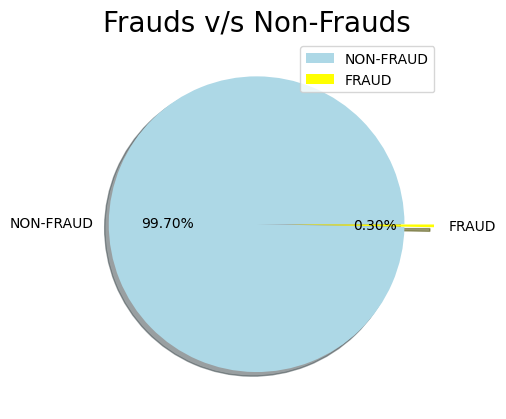

In [9]:
# checking the no. of frauds in the dataset
data['misstate'].value_counts()

# plotting a pie chart to represent the fraction of the frauds

size = [2762196, 8213]
labels = ['NON-FRAUD', 'FRAUD']
colors = ['lightblue', 'yellow']
explode = [0, 0.2]

plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, autopct='%.2f%%')
plt.title('Frauds v/s Non-Frauds', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()


# Verificar valores nulos

Matrix missing: Mostramos una matriz de calor para visualizar las variables con mayor presencia de valores perdidos. Las líneas blancas indican los valores faltantes en cada columna.

<Axes: >

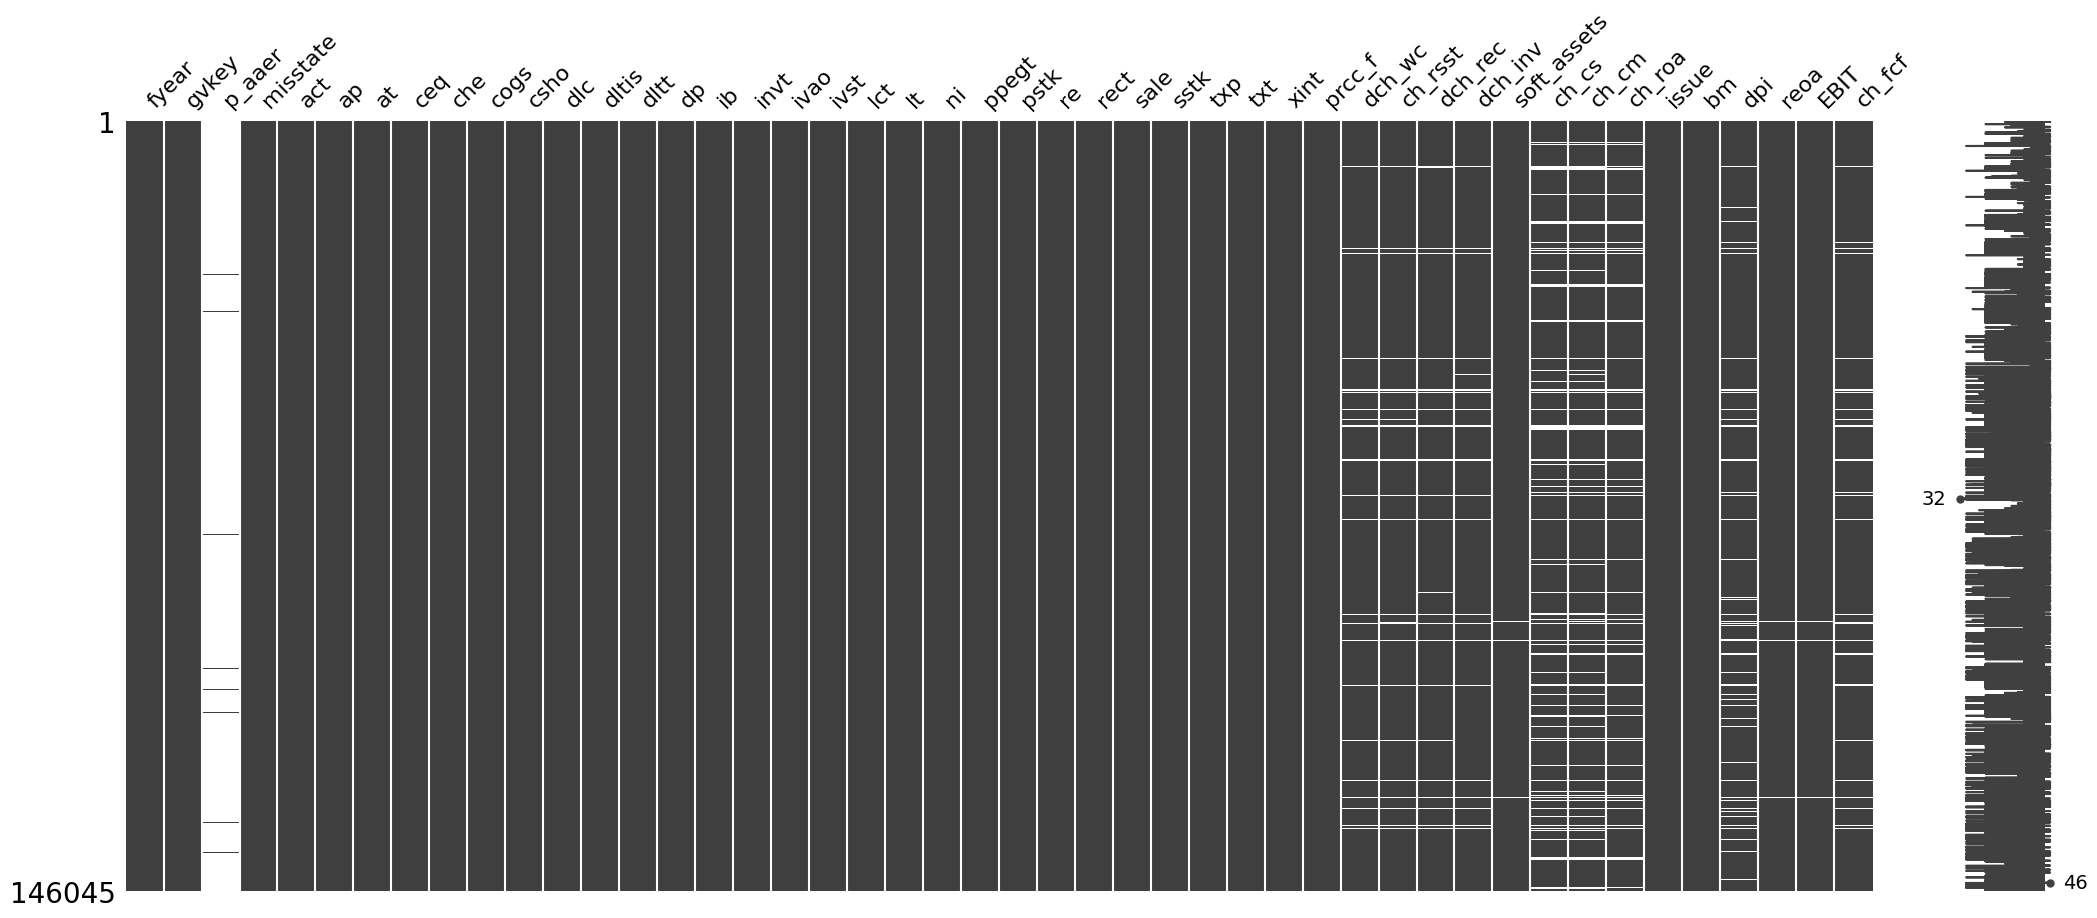

In [10]:
# matrix missing
msno.matrix(data)

In [11]:
#Verifico los datos faltantes del dataset o nulos
data.isnull().sum()

fyear               0
gvkey               0
p_aaer         145081
misstate            0
act                 0
ap                  0
at                  0
ceq                 0
che                 0
cogs                0
csho                0
dlc                 0
dltis               0
dltt                0
dp                  0
ib                  0
invt                0
ivao                0
ivst                0
lct                 0
lt                  0
ni                  0
ppegt               0
pstk                0
re                  0
rect                0
sale                0
sstk                0
txp                 0
txt                 0
xint                0
prcc_f              0
dch_wc           4759
ch_rsst          4851
dch_rec          4743
dch_inv          4615
soft_assets       592
ch_cs           15918
ch_cm           17107
ch_roa          12678
issue               0
bm                 18
dpi              9228
reoa              591
EBIT              591
ch_fcf    

In [12]:
# explorando la cantidad de valores perdidos en las variables
data.isna().sum()/data.shape[0]*100

fyear           0.000000
gvkey           0.000000
p_aaer         99.339929
misstate        0.000000
act             0.000000
ap              0.000000
at              0.000000
ceq             0.000000
che             0.000000
cogs            0.000000
csho            0.000000
dlc             0.000000
dltis           0.000000
dltt            0.000000
dp              0.000000
ib              0.000000
invt            0.000000
ivao            0.000000
ivst            0.000000
lct             0.000000
lt              0.000000
ni              0.000000
ppegt           0.000000
pstk            0.000000
re              0.000000
rect            0.000000
sale            0.000000
sstk            0.000000
txp             0.000000
txt             0.000000
xint            0.000000
prcc_f          0.000000
dch_wc          3.258585
ch_rsst         3.321579
dch_rec         3.247629
dch_inv         3.159985
soft_assets     0.405355
ch_cs          10.899380
ch_cm          11.713513
ch_roa          8.680886


Columna "p_aaer": Esta columna tiene un alto porcentaje de valores perdidos (99.34%). Dado que la mayoría de los datos en esta columna son valores perdidos, es posible que desees considerar eliminarla por completo, ya que es poco probable que proporcione información útil para tu análisis.

Columnas con Valores Perdidos Moderados: Algunas columnas, como "dch_wc", "ch_rsst", "dch_rec", "dch_inv", "ch_cs", "ch_cm", "ch_roa" y "ch_fcf", tienen porcentajes moderados de valores perdidos que oscilan entre el 3% y el 11%. Puedes considerar diferentes enfoques para manejar estos valores perdidos, como la imputación, dependiendo de la importancia de estas columnas para tu análisis.

Otras Columnas: Las columnas restantes no tienen valores perdidos o tienen porcentajes muy bajos de valores perdidos.

In [13]:
data.isin([0]).sum()

fyear               0
gvkey               0
p_aaer              0
misstate       145081
act               847
ap               1403
at                591
ceq                78
che              4774
cogs             8302
csho               18
dlc             35443
dltis           71251
dltt            39430
dp               4401
ib                133
invt            39785
ivao            97276
ivst            92420
lct               145
lt                126
ni                 63
ppegt            3884
pstk           125026
re                154
rect             7333
sale            10402
sstk            39246
txp             86648
txt             35309
xint            16568
prcc_f              3
dch_wc            108
ch_rsst            37
dch_rec          5203
dch_inv         35388
soft_assets         0
ch_cs              84
ch_cm             137
ch_roa              4
issue           19937
bm                 76
dpi                 0
reoa              149
EBIT               25
ch_fcf    

Al revisar los datos por sumas de ceros, observamos columnas de datos que pueden presentar ceros en su caracterización, por lo cual debemos establecer una política para lidiar con estos.

# Eliminar columnas

Se eliminaron las columnas gvkey y p_aaer

<li>La variable "gvkey" identificador del fraude</li>
<li>La variable "p_aaer" se utiliza para gestionar el problema del fraude en serie. El fraude contable puede abarcar varios períodos consecutivos de presentación de informes, creando una situación del llamado “fraude en serie”</li>
<li>fyear año del fraude</li>

In [14]:
data = data.drop(['gvkey', 'p_aaer', 'fyear'], axis='columns')
data.head(10)

,misstate,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,32.853,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,2.017,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,6.500,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,0.587,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,0.000,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349
5,0,148.396,24.301,328.495,111.015,8.478,153.262,11.235,44.339,0.273,...,0.688689,0.040056,0.092675,0.003067,1,0.389406,0.851688,0.191741,0.105527,-0.034367
6,0,637.880,199.012,1011.901,324.132,113.271,1185.288,28.489,22.444,60.769,...,0.754448,-0.033881,-0.372440,-0.040405,1,1.379084,0.955720,-0.038167,0.055174,-0.042160
7,0,396.594,92.140,677.736,183.566,50.125,596.137,46.758,80.971,1.146,...,0.819713,0.047023,-0.061932,-0.108796,1,1.847471,0.964188,-0.192385,-0.031264,-0.041039
8,0,2657.800,966.300,13353.600,3727.400,949.300,10908.200,62.300,1319.100,2264.600,...,0.243882,0.117693,-0.369057,-0.047424,1,1.236793,0.996031,0.181389,0.022773,-0.038199
9,0,0.004,0.000,0.126,-0.778,0.000,0.000,9.928,0.624,0.132,...,0.809524,NaN,NaN,-1.520085,1,-0.156728,NaN,-22.174603,-7.016393,0.118902


# Técnicas de imputación de datos

Imputación Basada en Reglas de Negocio: Reemplazar los valores faltantes con cero

In [15]:
# Lista de las columnas que tienen valores perdidos
columnas_imputar = ['dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'ch_cs', 'ch_cm', 'ch_roa', 'bm', 'reoa', 'EBIT', 'ch_fcf', 'soft_assets', 'dpi']
#Reemplazar los valores nulos con -1 en las columnas seleccionados
data[columnas_imputar] = data[columnas_imputar].fillna(0)

In [16]:
# Después de la imputación
print(data[columnas_imputar].isnull().sum())

dch_wc         0
ch_rsst        0
dch_rec        0
dch_inv        0
ch_cs          0
ch_cm          0
ch_roa         0
bm             0
reoa           0
EBIT           0
ch_fcf         0
soft_assets    0
dpi            0
dtype: int64


In [17]:
# Itera a través de las columnas del DataFrame y verifica el equilibrio
for columna in data.columns:
    if data[columna].dtype == 'object':
        # Si es una variable categórica, verifica el equilibrio de las categorías
        counts = data[columna].value_counts()
        print(f"Variable categórica: {columna}")
        print(counts)
    elif data[columna].dtype in ['int64', 'float64']:
        # Si es una variable numérica, puedes calcular estadísticas descriptivas
        descripcion = data[columna].describe()
        print(f"Variable numérica: {columna}")
        print(descripcion)
    print('-' * 40)

Variable numérica: misstate
count    146045.000000
mean          0.006601
std           0.080976
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: misstate, dtype: float64
----------------------------------------
Variable numérica: act
count    146045.000000
mean        737.847759
std        3744.542368
min          -0.254000
25%           8.277000
50%          47.501000
75%         249.832000
max      152629.000000
Name: act, dtype: float64
----------------------------------------
Variable numérica: ap
count    146045.000000
mean        181.993488
std        1047.546104
min           0.000000
25%           1.151000
50%           6.462000
75%          42.259000
max       39903.000000
Name: ap, dtype: float64
----------------------------------------
Variable numérica: at
count    146045.000000
mean       2374.041576
std       11957.736980
min           0.000000
25%          18.281000
50%         105.346000
75%       

In [18]:
data.isna().sum()

misstate       0
act            0
ap             0
at             0
ceq            0
che            0
cogs           0
csho           0
dlc            0
dltis          0
dltt           0
dp             0
ib             0
invt           0
ivao           0
ivst           0
lct            0
lt             0
ni             0
ppegt          0
pstk           0
re             0
rect           0
sale           0
sstk           0
txp            0
txt            0
xint           0
prcc_f         0
dch_wc         0
ch_rsst        0
dch_rec        0
dch_inv        0
soft_assets    0
ch_cs          0
ch_cm          0
ch_roa         0
issue          0
bm             0
dpi            0
reoa           0
EBIT           0
ch_fcf         0
dtype: int64

# Mezclar el dataset

In [19]:
#Mezclar el dataset
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,misstate,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,0,317.817,35.084,1436.180,801.055,31.040,369.027,62.802,96.020,160.000,...,0.936903,0.222249,-0.014664,-0.002138,1,0.351481,0.759721,0.318232,0.097472,-0.036879
1,0,438.127,18.192,670.587,359.676,320.804,201.738,28.154,0.000,0.000,...,0.402901,0.066658,-0.054669,0.051154,1,0.397489,0.871131,0.749290,0.158491,0.001062
2,0,16.754,1.084,19.391,7.891,10.222,5.108,14.294,0.175,0.210,...,0.414367,0.110724,-0.067495,-0.016704,1,0.141915,0.859339,-3.903357,-0.345934,0.745308
3,0,22.484,2.322,32.549,25.431,7.239,25.004,11.150,0.093,0.000,...,0.550708,0.329846,-0.009896,0.164943,1,0.265210,0.919776,-0.301515,-0.035977,0.048606
4,0,238.572,0.028,364.886,296.615,123.316,204.520,132.316,0.000,0.000,...,0.335825,0.000000,0.000000,0.000000,1,0.034225,1.213447,0.602443,0.410367,0.192138
5,0,0.097,0.056,0.097,0.025,0.091,0.000,5.684,0.000,0.000,...,0.061856,0.000000,0.000000,1.621628,1,0.018326,0.000000,-51.195876,-1.618557,1.223881
6,0,8.351,7.359,48.051,20.048,0.564,17.742,92.241,5.770,2.446,...,0.235770,0.000000,0.000000,0.000000,1,1.278492,0.384109,-1.587792,-0.398972,0.163081
7,0,5.793,1.476,22.885,12.453,2.152,21.126,3.398,0.410,0.000,...,0.191960,0.149694,0.047577,0.006521,1,0.574871,0.899029,0.306751,0.137164,-0.019615
8,0,5.985,0.668,7.875,4.909,4.234,11.922,23.457,1.399,0.000,...,0.256762,9.600000,-0.993506,1.621628,1,0.072164,1.279306,-5.733587,-0.446603,0.040473
9,0,0.006,0.028,5.454,5.371,0.004,0.000,2.645,0.000,0.000,...,0.006967,-0.920000,0.458333,0.026190,1,3.384374,1.373248,-0.733957,-0.074441,0.059233


<h2 id="pattern_visualization">2. Análisis de patrones de características individuales mediante visualización</h2>
- Para instalar seaborn usamos  pip que es el administrador de paquetes de python.

### calcular la correlación entre variables de tipo “int64” o “float64” utilizando el método “corr”:

In [20]:
corr = data.corr()
# Aplica un mapa de colores a la tabla
corr.style.background_gradient("RdYlGn", low=-1, high=1)

# Imprime la tabla
print(corr)

             misstate       act        ap        at       ceq       che  \
misstate     1.000000  0.022300  0.027725  0.021769  0.021051  0.015030   
act          0.022300  1.000000  0.837398  0.878315  0.781781  0.824967   
ap           0.027725  0.837398  1.000000  0.814882  0.714306  0.606061   
at           0.021769  0.878315  0.814882  1.000000  0.922935  0.696252   
ceq          0.021051  0.781781  0.714306  0.922935  1.000000  0.674905   
che          0.015030  0.824967  0.606061  0.696252  0.674905  1.000000   
cogs         0.019290  0.775588  0.893112  0.766761  0.688589  0.499444   
csho         0.014707  0.380716  0.320160  0.422942  0.431327  0.387291   
dlc          0.010195  0.756073  0.626860  0.732312  0.589192  0.504066   
dltis        0.012666  0.443239  0.432536  0.502433  0.410146  0.295679   
dltt         0.023159  0.704906  0.646234  0.869181  0.688693  0.540087   
dp           0.012092  0.734202  0.727898  0.897125  0.828959  0.581175   
ib          -0.001749  0.

In [21]:
# Visualizar la relación entre todas las variables utilizando una matriz de diagramas de dispersión
#sns.pairplot(data)

In [22]:
#Guardamos el dataset- Hacemos una clasificacion binaria.
data.to_csv('fraude1.csv', index=False)

# Nuevo conjunto de datos fraude1

In [23]:
data1 = pd.read_csv('fraude1.csv')
data1.sample(10)

,misstate,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
105853,0,19.645,0.836,24.231,15.918,17.823,0.548,10.087,6.413,2.377,...,0.117123,0.000000,0.000000,0.000000,1,0.299444,0.604546,-1.170732,-0.206471,-0.264820
86260,0,3024.318,1061.083,7743.023,3883.159,2147.136,9178.826,100.550,194.121,75.841,...,0.278382,0.230542,-0.016633,0.012803,1,0.308953,1.034658,0.349813,0.178759,-0.094167
27878,0,861.570,83.837,1284.765,867.827,289.297,658.083,56.496,29.726,0.000,...,0.643136,0.048579,-0.069000,-0.007719,1,0.983095,1.371069,0.444069,0.131519,-0.081508
62968,0,4.892,0.531,17.469,7.200,1.861,1.585,25.292,1.133,0.089,...,0.651039,0.000000,0.000000,0.000000,1,0.104708,0.618737,-1.236419,-0.842178,-1.927092
8684,0,15.250,3.453,17.520,11.385,0.150,35.784,4.215,0.000,0.500,...,0.861872,0.134822,-0.084197,0.022723,1,0.454955,1.080622,0.338642,0.057477,-0.052773
5551,0,1.407,0.297,1.941,1.232,0.718,2.325,4.221,0.068,0.000,...,0.403400,-0.309753,-0.916872,-0.334021,1,0.456053,0.691921,-31.712519,-2.823287,2.503538
106929,0,40.445,2.833,74.548,29.059,1.500,20.231,4.294,7.261,0.000,...,0.933305,0.145047,-0.148742,-0.084633,0,1.002570,0.958198,0.319620,-0.022589,-0.064716
47855,0,0.000,0.383,0.062,-0.388,0.000,0.000,16.464,0.067,0.000,...,0.080645,-2.203390,-5.394366,-1.671565,1,-0.067333,2.680000,-89.013245,-7.016393,-0.068631
13572,0,17.930,1.009,26.778,13.590,0.317,21.425,4.008,2.698,1.314,...,0.688140,0.055670,0.252009,0.011743,1,0.355049,1.098939,0.419038,0.073979,-0.034479
50554,0,169.661,46.414,361.792,230.867,26.558,57.604,54.462,40.983,0.000,...,0.674622,-0.196046,0.005722,-0.094013,0,4.937457,0.880602,0.359364,0.032231,-0.163493


In [24]:
from sklearn.model_selection import train_test_split

El conjunto de datos se divide inicialmente en un conjunto de entrenamiento y un conjunto de pruebas utilizando la función train_test_split de sklearn.model_selection, con un tamaño de prueba del 30% del conjunto de datos inicial.

Luego, el conjunto de pruebas se divide en un conjunto de validación y un nuevo conjunto de pruebas utilizando nuevamente train_test_split, con un tamaño de prueba del 70% del conjunto de pruebas original.

X_train = train_set.drop("misstate", axis=1)
y_train = train_set["misstate"].copy()

#Ahora eempezamos a construir el modelo, separamos los datos de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

print('longitud del training set', len(train_set))
print('longitud del validation set', len(val_set))
print('longitud del test set', len(test_set))

In [25]:
X= data1.drop('misstate', axis=1)
y = data1['misstate']

In [26]:
#Ahora eempezamos a construir el modelo, separamos los datos de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102231 entries, 83313 to 121958
Data columns (total 42 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   act          102231 non-null  float64
 1   ap           102231 non-null  float64
 2   at           102231 non-null  float64
 3   ceq          102231 non-null  float64
 4   che          102231 non-null  float64
 5   cogs         102231 non-null  float64
 6   csho         102231 non-null  float64
 7   dlc          102231 non-null  float64
 8   dltis        102231 non-null  float64
 9   dltt         102231 non-null  float64
 10  dp           102231 non-null  float64
 11  ib           102231 non-null  float64
 12  invt         102231 non-null  float64
 13  ivao         102231 non-null  float64
 14  ivst         102231 non-null  float64
 15  lct          102231 non-null  float64
 16  lt           102231 non-null  float64
 17  ni           102231 non-null  float64
 18  ppegt        102231 

# Técnicas de escalado

La elección entre las técnicas de escalado de características como RobustScaler, StandardScaler y MinMaxScaler depende de la naturaleza de tus datos y los requisitos de tu modelo de machine learning. Cada técnica tiene sus propias características y es adecuada para diferentes situaciones. Aquí hay una guía general sobre cuándo usar cada una:

**RobustScaler**:
- *Cuándo usarlo*: Utiliza RobustScaler cuando tus datos contienen valores atípicos o anomalías. RobustScaler es resistente a los valores extremos y utiliza estadísticas robustas como la mediana y el rango intercuartílico para escalar los datos.
- *Ventajas*: Bueno para datos con valores atípicos, ya que no se ven afectados por ellos.
- *Consideraciones*: No restringe los datos a un rango específico como MinMaxScaler, por lo que los datos pueden tener una mayor dispersión.

**StandardScaler (Z-Score Scaling)**:
- *Cuándo usarlo*: Utiliza StandardScaler cuando tus datos sigan una distribución normal o aproximadamente normal. Es una opción sólida para muchas técnicas de machine learning, como regresión lineal, SVM y algoritmos basados en gradiente.
- *Ventajas*: Transforma los datos para que tengan una media de cero y una desviación estándar de uno, lo que puede ser beneficioso para algoritmos que asumen normalidad.
- *Consideraciones*: Puede verse afectado por valores atípicos y no es adecuado para datos que no siguen una distribución normal.

**MinMaxScaler**:
- *Cuándo usarlo*: Utiliza MinMaxScaler cuando desees que tus datos se escalen a un rango específico, generalmente entre 0 y 1. Es útil para algoritmos que requieren que los datos estén en un rango acotado, como las redes neuronales y los algoritmos de clustering basados en distancia.
- *Ventajas*: Escala los datos al rango deseado, lo que puede mejorar la convergencia en algunos algoritmos.
- *Consideraciones*: Sensible a valores atípicos si los valores extremos están presentes.

La elección de la técnica depende de la naturaleza de tus datos y del algoritmo que planeas usar. Aquí hay algunas pautas generales:

- Si tienes valores atípicos en tus datos y deseas ser resistente a ellos, considera RobustScaler.
- Si tus datos siguen una distribución normal y planeas utilizar algoritmos que asumen normalidad, elige StandardScaler.
- Si deseas que tus datos estén en un rango específico, como [0, 1], usa MinMaxScaler.


# RobustScaler

fyear: Si "fyear" representa el año o período al que se refieren tus datos, no suele ser necesario escalarlo, ya que no tiene sentido cambiar la escala de un valor temporal. Puedes mantenerlo tal como está para identificar el año al que pertenecen tus observaciones.

gvkey: Si "gvkey" es una clave de identificación única para tus observaciones, generalmente no se escala. Esta variable es crucial para identificar y relacionar tus datos, por lo que no debe transformarse como las características numéricas.

p_aaer: La variable "p_aaer" parece ser una característica relacionada con el fraude contable. Al igual que "gvkey," si esta variable tiene un significado específico en tu análisis, generalmente no se escala. Sin embargo, si "p_aaer" es una característica numérica que se debe escalar junto con otras características numéricas, entonces deberías escalarla.


In [28]:
#Ahora importamos el escalador, instaciamos y transformamos el dataset original
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns
X_train_scaled.head()

,act,ap,at,ceq,che,cogs,csho,dlc,dltis,dltt,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,-0.123014,-0.003387,-0.119675,-0.141495,-0.148845,0.029591,-0.354142,-0.107440,0.48556,0.009417,...,0.366904,-0.996592,0.837244,-4.298870,0.0,1.245940,-0.084399,-0.150330,-2.298228,0.000340
1,-0.157503,-0.125578,-0.138184,-0.144511,-0.085731,-0.130139,-0.134236,-0.091332,0.10344,-0.017101,...,-0.357730,2.142330,25.782137,1.356620,0.0,-0.610477,-0.345436,-1.022451,-1.002412,1.312754
2,-0.142343,-0.117256,-0.126662,-0.121375,-0.148123,-0.109435,-0.383705,0.141924,-0.00244,-0.034879,...,0.319445,-0.621728,1.319703,1.107522,0.0,1.656220,1.096432,0.198615,-0.129362,0.663737
3,2.314844,1.650845,2.221253,4.558263,5.211028,2.642738,0.528058,-0.039723,-0.00244,-0.010487,...,-0.629556,-0.032247,-0.618361,-0.872508,0.0,0.693129,0.003921,0.574526,0.212741,-0.430221
4,-0.182061,-0.035997,-0.087858,-0.109828,-0.158768,-0.140149,-0.094863,0.866091,0.02204,-0.029155,...,-0.924221,-0.025691,-1.080210,0.540925,0.0,-0.011014,-1.517032,0.109906,0.360836,-0.338178


In [29]:
X_train.head(10)

,act,ap,at,ceq,che,cogs,csho,dlc,dltis,dltt,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
83313,18.291,6.354,27.779,10.295,0.608,65.143,4.134,0.000,12.200,5.696,...,0.691062,-0.224617,0.256393,-0.354633,1,1.207723,0.939358,-0.170237,-0.493646,-0.021554
87729,9.928,1.303,15.609,9.494,4.367,6.294,15.567,0.206,2.647,2.328,...,0.358319,0.606659,7.895393,0.111914,1,0.066836,0.868952,-1.133192,-0.190851,0.205207
13742,13.604,1.647,23.185,15.639,0.651,13.922,2.597,3.189,0.000,0.070,...,0.669269,-0.125342,0.404139,0.091365,1,1.459866,1.257849,0.215053,0.013155,0.093069
133335,609.435,74.735,1567.026,1258.579,319.834,1027.901,50.000,0.866,0.000,3.168,...,0.233500,0.030769,-0.189364,-0.071977,1,0.867986,0.963180,0.630116,0.093095,-0.095947
36410,3.973,5.006,48.700,18.706,0.017,2.606,17.614,12.450,0.612,0.797,...,0.098193,0.032506,-0.330798,0.044623,1,0.435244,0.552952,0.117105,0.127700,-0.080044
27646,14.325,19.515,156.803,76.072,3.322,7.078,14.591,1.037,0.000,34.113,...,0.116120,0.413300,-0.326875,0.016258,1,0.724014,0.999983,0.069023,0.101854,-0.050837
140258,2.217,0.122,43.314,41.981,2.123,0.000,48.047,0.058,0.000,1.107,...,0.036085,4.000000,-0.989976,0.014792,1,2.647723,1.139867,-0.169506,-0.018816,-0.012046
32108,42.074,0.825,102.704,72.151,9.749,18.806,8.903,5.309,0.000,1.412,...,0.700820,0.280114,0.015553,0.053390,1,0.805579,1.007525,-0.384941,0.090396,-0.094676
33700,141.299,41.930,752.615,173.503,122.870,143.617,20.969,115.768,402.200,343.420,...,0.067260,0.041895,-0.355717,-0.012341,1,0.591019,2.473044,-0.039389,0.007442,-0.080930
68566,1672.222,33.258,4164.154,1587.360,777.866,343.217,137.037,523.734,0.000,33.412,...,0.686416,0.295642,-0.015013,-0.026418,1,0.099173,0.715802,0.041340,-0.000402,-0.081765


## Selección y Reducción de caracteristicas mediante Random Forests Robust Scaler

In [30]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [31]:
clf_rnd.feature_importances_

array([0.02514198, 0.02807129, 0.02331306, 0.02569726, 0.02865925,
       0.02734406, 0.03060624, 0.02007748, 0.01620225, 0.01784055,
       0.0230981 , 0.02142036, 0.02462351, 0.01779139, 0.01343434,
       0.02778019, 0.02375715, 0.02178534, 0.0276849 , 0.00948483,
       0.02559614, 0.02911288, 0.02448739, 0.0220744 , 0.01588758,
       0.02455444, 0.02410636, 0.02728277, 0.02655776, 0.02288463,
       0.02961191, 0.02639289, 0.03510825, 0.02938316, 0.02865311,
       0.0267182 , 0.00097407, 0.02816624, 0.02491755, 0.02694186,
       0.02451639, 0.02225848])

In [32]:
# Podemos extraer que características son más importantes para la correcta clasificación de los datos
feature_importances = {name: score for name, score in zip(list(X_train_scaled), clf_rnd.feature_importances_)}

In [33]:
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted

soft_assets    0.035108
csho           0.030606
dch_rec        0.029612
ch_cs          0.029383
rect           0.029113
che            0.028659
ch_cm          0.028653
bm             0.028166
ap             0.028071
lct            0.027780
ppegt          0.027685
cogs           0.027344
prcc_f         0.027283
reoa           0.026942
ch_roa         0.026718
dch_wc         0.026558
dch_inv        0.026393
ceq            0.025697
re             0.025596
act            0.025142
dpi            0.024918
invt           0.024624
txt            0.024554
EBIT           0.024516
sale           0.024487
xint           0.024106
lt             0.023757
at             0.023313
dp             0.023098
ch_rsst        0.022885
ch_fcf         0.022258
sstk           0.022074
ni             0.021785
ib             0.021420
dlc            0.020077
dltt           0.017841
ivao           0.017791
dltis          0.016202
txp            0.015888
ivst           0.013434
pstk           0.009485
issue          0

In [34]:
feature_importances_sorted.sum()

0.9999999999999999

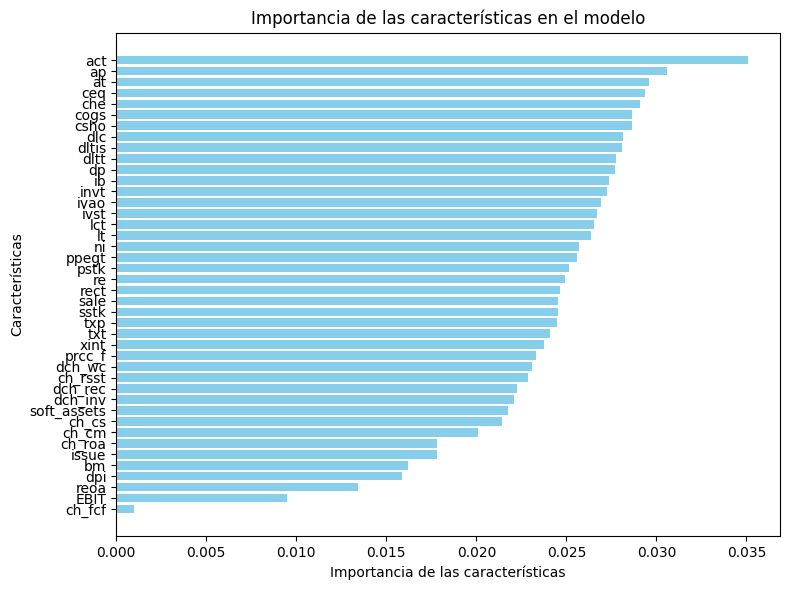

In [35]:
from matplotlib import pyplot as plt
import numpy as np

# Supongamos que feature_importances_sorted es la lista de importancias de características que quieres trazar
# y X_train_scaled.columns es la lista de nombres de características.

# Crear un DataFrame para el gráfico
for_plot = pd.DataFrame({'x_axis': X_train_scaled.columns, 'y_axis': feature_importances_sorted}).sort_values(by='y_axis', ascending=True)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar las barras horizontales
ax.barh(for_plot['x_axis'], for_plot['y_axis'], color='skyblue')

# Ajustar la apariencia de los ejes
ax.set_xlabel('Importancia de las características')
ax.set_ylabel('Características')
ax.set_title('Importancia de las características en el modelo')

# Ajustar el diseño para evitar el solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Reducción del número de características Robust Scaler

In [36]:
#Extraemos las 10 caracteristicas con mas relevancia para el algoritmo
X_reduced = X_train_scaled[list(feature_importances_sorted.head(10).index)].copy()
X_reduced

,soft_assets,csho,dch_rec,ch_cs,rect,che,ch_cm,bm,ap,lct
0,0.366904,-0.354142,-1.781157,-0.996592,-0.056406,-0.148845,0.837244,1.245940,-0.003387,-0.085005
1,-0.357730,-0.134236,1.377155,2.142330,-0.128246,-0.085731,25.782137,-0.610477,-0.125578,-0.144203
2,0.319445,-0.383705,0.195513,-0.621728,-0.090814,-0.148123,1.319703,1.656220,-0.117256,-0.122498
3,-0.629556,0.528058,0.003876,-0.032247,0.840854,5.211028,-0.618361,0.693129,1.650845,0.620658
4,-0.924221,-0.094863,0.699484,-0.025691,-0.111461,-0.158768,-1.080210,-0.011014,-0.035997,-0.037738
...,...,...,...,...,...,...,...,...,...,...
102226,0.212960,2.384724,1.124923,0.636712,44.331280,12.495412,-0.108872,-0.155953,46.642330,40.090408
102227,-0.036183,-0.145757,2.107805,1.566272,-0.056406,0.017579,-0.189379,-0.288360,-0.105136,-0.112350
102228,0.191935,2.483896,-0.133865,0.223002,1.880558,0.381726,0.029040,-0.312186,14.340736,8.340854
102229,0.324115,-0.194555,1.574726,0.005323,1.790298,1.362862,-1.709206,0.159045,1.447928,1.224126


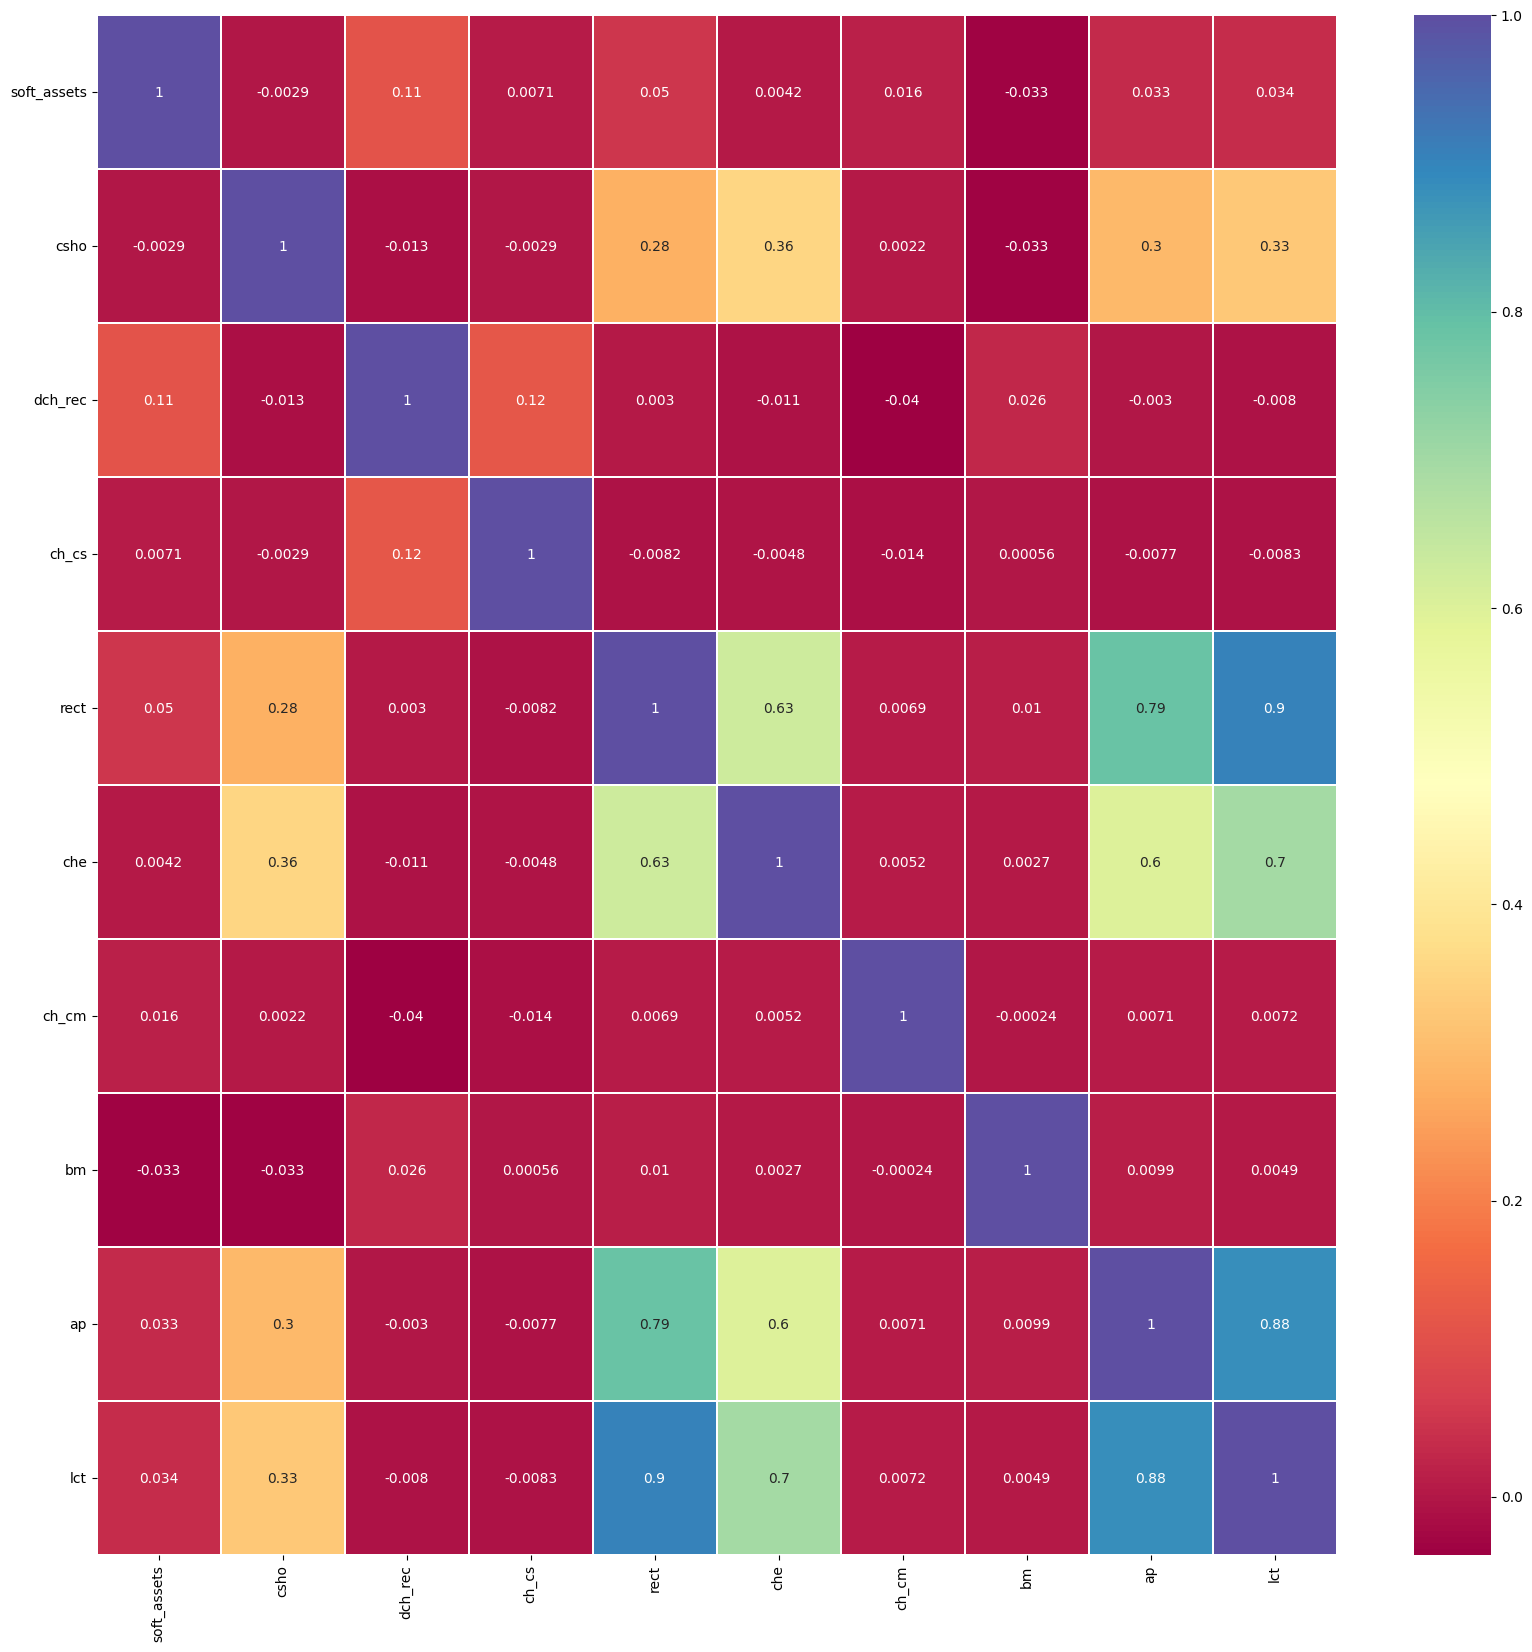

In [37]:
# Creating a correlation heatmap
sns.heatmap(X_reduced.corr(),annot=True, cmap='Spectral', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [38]:
#NO esta desbalanceado, no necesita balanceo
y_train.value_counts()

0    101566
1       665
Name: misstate, dtype: int64

In [39]:
X_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102231 entries, 0 to 102230
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   soft_assets  102231 non-null  float64
 1   csho         102231 non-null  float64
 2   dch_rec      102231 non-null  float64
 3   ch_cs        102231 non-null  float64
 4   rect         102231 non-null  float64
 5   che          102231 non-null  float64
 6   ch_cm        102231 non-null  float64
 7   bm           102231 non-null  float64
 8   ap           102231 non-null  float64
 9   lct          102231 non-null  float64
dtypes: float64(10)
memory usage: 7.8 MB


In [40]:
print('#### Mezclar la base de datos###############')
#Mezclar la base de datos
X_reduced = X_reduced.sample(frac=1).reset_index(drop=True)
X_reduced.head(10)

#### Mezclar la base de datos###############


,soft_assets,csho,dch_rec,ch_cs,rect,che,ch_cm,bm,ap,lct
0,0.418149,-0.136563,-0.267113,0.135215,0.646715,2.917098,0.053997,-6.853624,0.776205,0.603384
1,-0.036196,0.393591,4.518406,-0.847822,3.663275,0.845690,-7.846541,-0.257939,4.857343,2.049631
2,-1.093591,0.179667,-0.021935,-0.148433,-0.158921,-0.131669,0.000000,-0.584514,-0.156664,-0.170714
3,0.500220,-0.249392,-1.022762,-0.028218,0.066189,-0.159054,-1.454878,0.652934,0.134069,0.288988
4,0.087723,-0.371202,2.540598,-0.148433,-0.128195,-0.157308,0.000000,-0.087005,-0.101991,-0.138823
5,0.363161,0.023620,-0.745498,0.528286,0.672832,-0.159054,0.876922,1.096461,0.930256,0.269747
6,-1.019000,-0.354796,-0.293107,-3.224544,-0.158985,-0.083313,29.197525,-0.446827,-0.145947,-0.151933
7,0.730080,-0.420077,-7.351713,-0.482445,-0.154518,-0.158936,2.209823,3.069817,-0.154123,-0.169872
8,-0.766419,4.607111,0.369313,3.603142,3.802591,3.970987,0.230939,-0.048497,17.113530,8.669003
9,0.590522,0.249372,1.081608,-0.055294,1.507662,-0.129419,-0.830370,-0.017179,0.742918,1.132249


## Reducción número de características con Robust Scaler

In [41]:
# Primer paso para PCA es identificar el valor promedio y dispersión de las variables.
print('----------------------')
print('Media de cada variable')
print('----------------------')
X_reduced.mean(axis=0)

----------------------
Media de cada variable
----------------------


soft_assets   -0.054063
csho           1.446547
dch_rec        0.214285
ch_cs          0.478454
rect           3.334872
che            3.532875
ch_cm         -0.263052
bm             0.041146
ap             4.244629
lct            4.203605
dtype: float64

In [42]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
X_reduced.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


soft_assets      0.358962
csho           125.865497
dch_rec          3.847016
ch_cs           24.361804
rect           435.048904
che            490.233000
ch_cm           75.792619
bm               4.577538
ap             631.294873
lct            598.185949
dtype: float64

# MIN MAX SCALER

In [43]:
#Ahora importamos el escalador, instaciamos y transformamos el dataset original
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_scaled_1 = min_max_scaler.fit_transform(X_train)
X_train_scaled_1 = pd.DataFrame(X_train_scaled_1)
X_train_scaled_1.columns = X_train.columns
X_train_scaled_1.head()

,act,ap,at,ceq,che,cogs,csho,dlc,dltis,dltt,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,0.000121,0.000161,0.000069,0.102365,0.000449,0.001057,0.000041,9.132653e-07,0.000182,5.358016e-05,...,0.695514,0.389176,0.519136,0.399895,1.0,0.688456,0.232718,0.989367,0.861998,0.420175
1,0.000066,0.000033,0.000039,0.102362,0.000498,0.000913,0.000156,3.639826e-06,0.000128,2.189863e-05,...,0.360627,0.440859,0.744252,0.541565,1.0,0.593158,0.215276,0.978644,0.902013,0.452375
2,0.000090,0.000042,0.000058,0.102387,0.000450,0.000931,0.000026,4.312201e-05,0.000113,6.584641e-07,...,0.673581,0.395348,0.523490,0.535325,1.0,0.709517,0.311622,0.993658,0.928973,0.436451
3,0.003994,0.001891,0.003894,0.107363,0.004592,0.003412,0.000500,1.237541e-05,0.000113,2.980020e-05,...,0.235004,0.405054,0.505999,0.485725,1.0,0.660077,0.238620,0.998280,0.939537,0.409612
4,0.000027,0.000127,0.000121,0.102399,0.000441,0.000904,0.000176,1.656981e-04,0.000116,7.497084e-06,...,0.098826,0.405162,0.501831,0.521132,1.0,0.623931,0.136989,0.992567,0.944110,0.411870


## Selección y Reducción de caracteristicas mediante Random Forests Min Max Scaler

In [44]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd_1 = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd_1.fit(X_train_scaled_1, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [45]:
clf_rnd_1.feature_importances_

array([0.02531329, 0.0287255 , 0.02501817, 0.02482967, 0.02693408,
       0.02596479, 0.03095729, 0.01940209, 0.01639282, 0.018635  ,
       0.02383032, 0.0213829 , 0.02565588, 0.01832585, 0.01316707,
       0.02552647, 0.02428984, 0.02173474, 0.02707928, 0.00830939,
       0.02435384, 0.02477368, 0.02315741, 0.02546513, 0.01836603,
       0.02277048, 0.02395709, 0.02852921, 0.02618888, 0.02342298,
       0.03099346, 0.02642436, 0.03419172, 0.02918021, 0.02810565,
       0.02624314, 0.00098896, 0.02781372, 0.02425428, 0.02958043,
       0.02556464, 0.02420026])

In [46]:
# Podemos extraer que características son más importantes para la correcta clasificación de los datos
feature_importances_1 = {name: score for name, score in zip(list(X_train_scaled_1), clf_rnd_1.feature_importances_)}

In [47]:
feature_importances_sorted_1 = pd.Series(feature_importances_1).sort_values(ascending=False)
feature_importances_sorted_1

soft_assets    0.034192
dch_rec        0.030993
csho           0.030957
reoa           0.029580
ch_cs          0.029180
ap             0.028726
prcc_f         0.028529
ch_cm          0.028106
bm             0.027814
ppegt          0.027079
che            0.026934
dch_inv        0.026424
ch_roa         0.026243
dch_wc         0.026189
cogs           0.025965
invt           0.025656
EBIT           0.025565
lct            0.025526
sstk           0.025465
act            0.025313
at             0.025018
ceq            0.024830
rect           0.024774
re             0.024354
lt             0.024290
dpi            0.024254
ch_fcf         0.024200
xint           0.023957
dp             0.023830
ch_rsst        0.023423
sale           0.023157
txt            0.022770
ni             0.021735
ib             0.021383
dlc            0.019402
dltt           0.018635
txp            0.018366
ivao           0.018326
dltis          0.016393
ivst           0.013167
pstk           0.008309
issue          0

In [48]:
feature_importances_sorted_1.sum()

1.0000000000000002

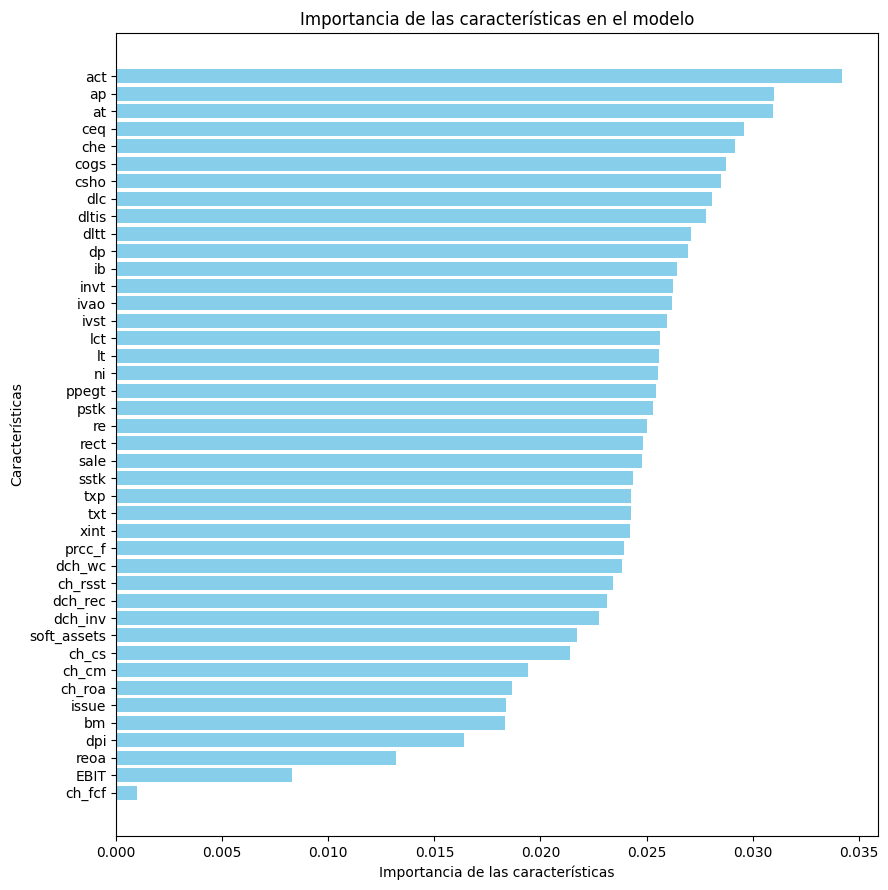

In [49]:
from matplotlib import pyplot as plt
import numpy as np

# Supongamos que feature_importances_sorted es la lista de importancias de características que quieres trazar
# y X_train_scaled.columns es la lista de nombres de características.

# Crear un DataFrame para el gráfico
for_plot = pd.DataFrame({'x_axis': X_train_scaled_1.columns, 'y_axis': feature_importances_sorted_1}).sort_values(by='y_axis', ascending=True)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(9, 9))

# Graficar las barras horizontales
ax.barh(for_plot['x_axis'], for_plot['y_axis'], color='skyblue')

# Ajustar la apariencia de los ejes
ax.set_xlabel('Importancia de las características')
ax.set_ylabel('Características')
ax.set_title('Importancia de las características en el modelo')

# Ajustar el diseño para evitar el solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Reducción número de características con Min Max Scaler

In [50]:
#Extraemos las 10 caracteristicas con mas relevancia para el algoritmo
X_reduced_1 = X_train_scaled_1[list(feature_importances_sorted_1.head(10).index)].copy()
X_reduced_1

,soft_assets,dch_rec,csho,reoa,ch_cs,ap,prcc_f,ch_cm,bm,ppegt
0,0.695514,0.340235,0.000041,0.989367,0.389176,0.000161,0.000480,0.519136,0.688456,0.000025
1,0.360627,0.533136,0.000156,0.978644,0.440859,0.000033,0.002122,0.744252,0.593158,0.000022
2,0.673581,0.460964,0.000026,0.993658,0.395348,0.000042,0.000959,0.523490,0.709517,0.000028
3,0.235004,0.449260,0.000500,0.998280,0.405054,0.001891,0.006744,0.505999,0.660077,0.003152
4,0.098826,0.491746,0.000176,0.992567,0.405162,0.000127,0.000567,0.501831,0.623931,0.000145
...,...,...,...,...,...,...,...,...,...,...
102226,0.624369,0.517730,0.001464,0.994090,0.416068,0.048949,0.027051,0.510597,0.616490,0.027173
102227,0.509229,0.577762,0.000150,0.976174,0.431374,0.000054,0.000733,0.509871,0.609693,0.000022
102228,0.614653,0.440847,0.001515,0.996269,0.409257,0.015164,0.008227,0.511842,0.608470,0.005669
102229,0.675739,0.545203,0.000124,0.996045,0.405672,0.001679,0.008634,0.496155,0.632661,0.000355


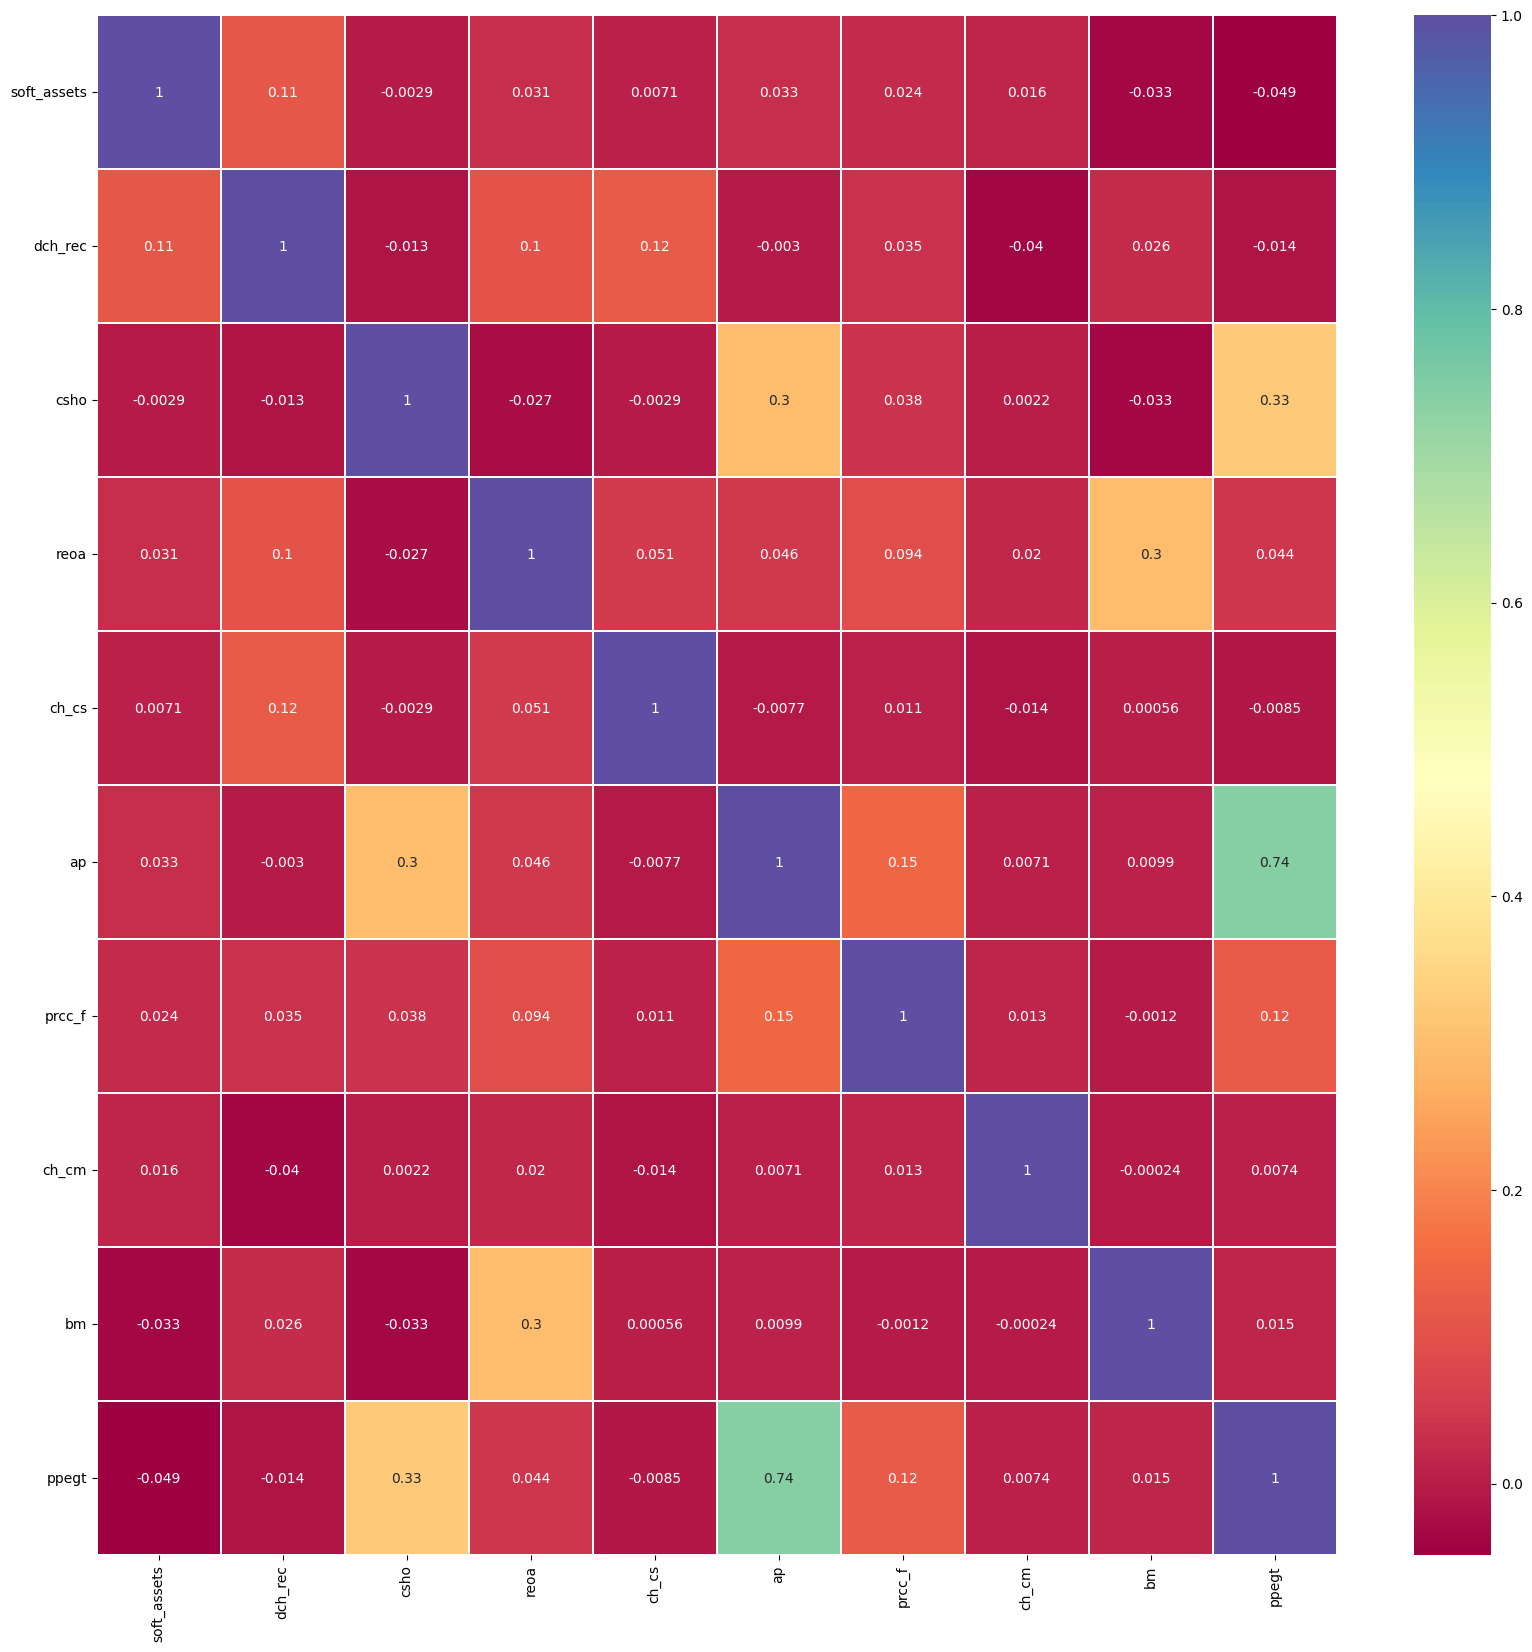

In [51]:
# Creating a correlation heatmap
sns.heatmap(X_reduced_1.corr(),annot=True, cmap='Spectral', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [52]:
#NO esta desbalanceado, no necesita balanceo
y_train.value_counts()

0    101566
1       665
Name: misstate, dtype: int64

In [53]:
X_reduced_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102231 entries, 0 to 102230
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   soft_assets  102231 non-null  float64
 1   dch_rec      102231 non-null  float64
 2   csho         102231 non-null  float64
 3   reoa         102231 non-null  float64
 4   ch_cs        102231 non-null  float64
 5   ap           102231 non-null  float64
 6   prcc_f       102231 non-null  float64
 7   ch_cm        102231 non-null  float64
 8   bm           102231 non-null  float64
 9   ppegt        102231 non-null  float64
dtypes: float64(10)
memory usage: 7.8 MB


In [3]:
print('#### Mezclar la base de datos###############')
#Mezclar la base de datos
X_reduced_1 = X_reduced_1.sample(frac=1).reset_index(drop=True)
X_reduced_1.head(10)

#### Mezclar la base de datos###############


NameError: ignored

## Reducción de dimensionalidad con Min Max Scaler

In [55]:
#Primer paso para PCA es identificar el valor promedio y dispersión de las variables.
print('----------------------')
print('Media de cada variable')
print('----------------------')
X_reduced_1.mean(axis=0)

----------------------
Media de cada variable
----------------------


soft_assets    0.500966
dch_rec        0.462111
csho           0.000977
reoa           0.956368
ch_cs          0.413463
ap             0.004604
prcc_f         0.003501
ch_cm          0.509206
bm             0.626608
ppegt          0.003744
dtype: float64

In [56]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
X_reduced_1.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


soft_assets    0.076667
dch_rec        0.014351
csho           0.000034
reoa           0.020234
ch_cs          0.006605
ap             0.000691
prcc_f         0.000084
ch_cm          0.006173
bm             0.012063
ppegt          0.000491
dtype: float64

# Standard Scaler

In [57]:
#Ahora importamos el escalador, instaciamos y transformamos el dataset original
from sklearn.preprocessing import StandardScaler
min_max_scaler = StandardScaler()
X_train_scaled_2 = min_max_scaler.fit_transform(X_train)
X_train_scaled_2 = pd.DataFrame(X_train_scaled_2)
X_train_scaled_2.columns = X_train.columns
X_train_scaled_2.head()

,act,ap,at,ceq,che,cogs,csho,dlc,dltis,dltt,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,-0.191403,-0.169072,-0.196769,-0.174263,-0.166284,-0.158735,-0.160505,-0.121495,-0.121433,-0.200682,...,0.702628,-0.298850,0.126386,-0.948805,0.397218,0.563118,-0.068852,0.231985,-0.246426,-0.022280
1,-0.193612,-0.173935,-0.197781,-0.174421,-0.163434,-0.166302,-0.140903,-0.121304,-0.127545,-0.201935,...,-0.506845,0.337107,2.991687,0.334626,0.397218,-0.304567,-0.198987,0.156597,0.041779,0.397661
2,-0.192641,-0.173604,-0.197151,-0.173211,-0.166252,-0.165321,-0.163140,-0.118531,-0.129238,-0.202775,...,0.623415,-0.222901,0.181803,0.278097,0.397218,0.754881,0.519830,0.262149,0.235957,0.189991
3,-0.035221,-0.103233,-0.068781,0.071581,0.075794,-0.034946,-0.081870,-0.120690,-0.129238,-0.201623,...,-0.960546,-0.103470,-0.040813,-0.171242,0.397218,0.304735,-0.024821,0.294644,0.312045,-0.160049
4,-0.195185,-0.170370,-0.195030,-0.172606,-0.166733,-0.166776,-0.137394,-0.109920,-0.128847,-0.202505,...,-1.452367,-0.102142,-0.093863,0.149516,0.397218,-0.024379,-0.783065,0.254481,0.344983,-0.130598


## Selección y Reducción de caracteristicas mediante Random Forests Standard Scaler

In [58]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd_2 = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd_2.fit(X_train_scaled_2, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [59]:
clf_rnd_2.feature_importances_

array([0.02483361, 0.02854516, 0.02369584, 0.02574983, 0.02883419,
       0.02769495, 0.03054954, 0.02033006, 0.01597934, 0.0179229 ,
       0.02453613, 0.02109108, 0.02497719, 0.01729773, 0.01343516,
       0.02787345, 0.02457834, 0.022226  , 0.02769524, 0.00923903,
       0.02594987, 0.02833226, 0.02423809, 0.02157945, 0.01600036,
       0.02463764, 0.02389317, 0.02708991, 0.0259049 , 0.02359191,
       0.03000283, 0.02614715, 0.03402623, 0.02959868, 0.02806152,
       0.02656974, 0.00094351, 0.02702029, 0.02465205, 0.02753276,
       0.02486992, 0.022273  ])

In [60]:
# Podemos extraer que características son más importantes para la correcta clasificación de los datos
feature_importances_2 = {name: score for name, score in zip(list(X_train_scaled_2), clf_rnd_2.feature_importances_)}

In [61]:
feature_importances_sorted_2 = pd.Series(feature_importances_2).sort_values(ascending=False)
feature_importances_sorted_2

soft_assets    0.034026
csho           0.030550
dch_rec        0.030003
ch_cs          0.029599
che            0.028834
ap             0.028545
rect           0.028332
ch_cm          0.028062
lct            0.027873
ppegt          0.027695
cogs           0.027695
reoa           0.027533
prcc_f         0.027090
bm             0.027020
ch_roa         0.026570
dch_inv        0.026147
re             0.025950
dch_wc         0.025905
ceq            0.025750
invt           0.024977
EBIT           0.024870
act            0.024834
dpi            0.024652
txt            0.024638
lt             0.024578
dp             0.024536
sale           0.024238
xint           0.023893
at             0.023696
ch_rsst        0.023592
ch_fcf         0.022273
ni             0.022226
sstk           0.021579
ib             0.021091
dlc            0.020330
dltt           0.017923
ivao           0.017298
txp            0.016000
dltis          0.015979
ivst           0.013435
pstk           0.009239
issue          0

In [62]:
feature_importances_sorted_2.sum()

1.0

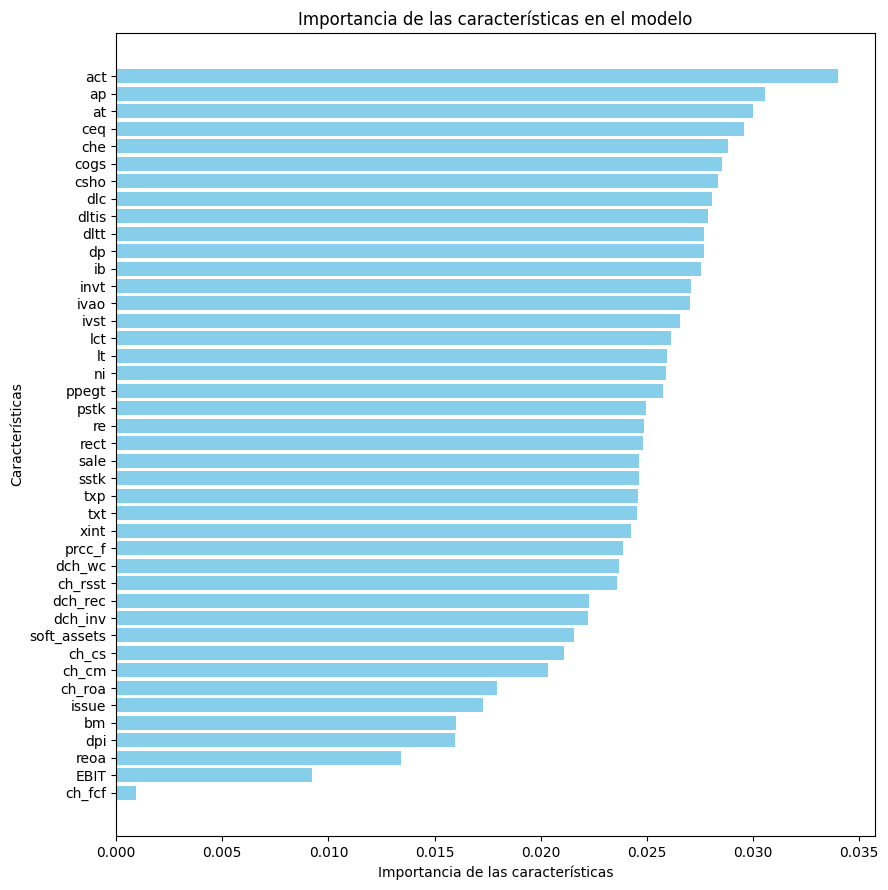

In [63]:
from matplotlib import pyplot as plt
import numpy as np

# Supongamos que feature_importances_sorted es la lista de importancias de características que quieres trazar
# y X_train_scaled.columns es la lista de nombres de características.

# Crear un DataFrame para el gráfico
for_plot = pd.DataFrame({'x_axis': X_train_scaled_2.columns, 'y_axis': feature_importances_sorted_2}).sort_values(by='y_axis', ascending=True)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(9, 9))

# Graficar las barras horizontales
ax.barh(for_plot['x_axis'], for_plot['y_axis'], color='skyblue')

# Ajustar la apariencia de los ejes
ax.set_xlabel('Importancia de las características')
ax.set_ylabel('Características')
ax.set_title('Importancia de las características en el modelo')

# Ajustar el diseño para evitar el solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Reducción número de características con Standard Scaler

In [64]:
#Extraemos las 10 caracteristicas con mas relevancia para el algoritmo
X_reduced_2 = X_train_scaled_2[list(feature_importances_sorted_2.head(10).index)].copy()
X_reduced_2

,soft_assets,csho,dch_rec,ch_cs,che,ap,rect,ch_cm,lct,ppegt
0,0.702628,-0.160505,-1.017371,-0.298850,-0.166284,-0.169072,-0.162591,0.126386,-0.175348,-0.167749
1,-0.506845,-0.140903,0.592886,0.337107,-0.163434,-0.173935,-0.166035,2.991687,-0.177768,-0.167886
2,0.623415,-0.163140,-0.009571,-0.222901,-0.166252,-0.173604,-0.164241,0.181803,-0.176881,-0.167617
3,-0.960546,-0.081870,-0.107276,-0.103470,0.075794,-0.103233,-0.119573,-0.040813,-0.146496,-0.026700
4,-1.452367,-0.137394,0.247377,-0.102142,-0.166733,-0.170370,-0.165231,-0.093863,-0.173415,-0.162322
...,...,...,...,...,...,...,...,...,...,...
102226,0.445682,0.083625,0.464287,0.032064,0.404792,1.687440,1.965526,0.017710,1.467300,1.056823
102227,0.029842,-0.141930,0.965406,0.220396,-0.158768,-0.173122,-0.162591,0.008462,-0.176466,-0.167898
102228,0.410591,0.092464,-0.177503,-0.051755,-0.142321,0.401828,-0.069725,0.033551,0.169159,0.086813
102229,0.631209,-0.146280,0.693617,-0.095858,-0.098008,-0.111309,-0.074053,-0.166113,-0.121822,-0.152851


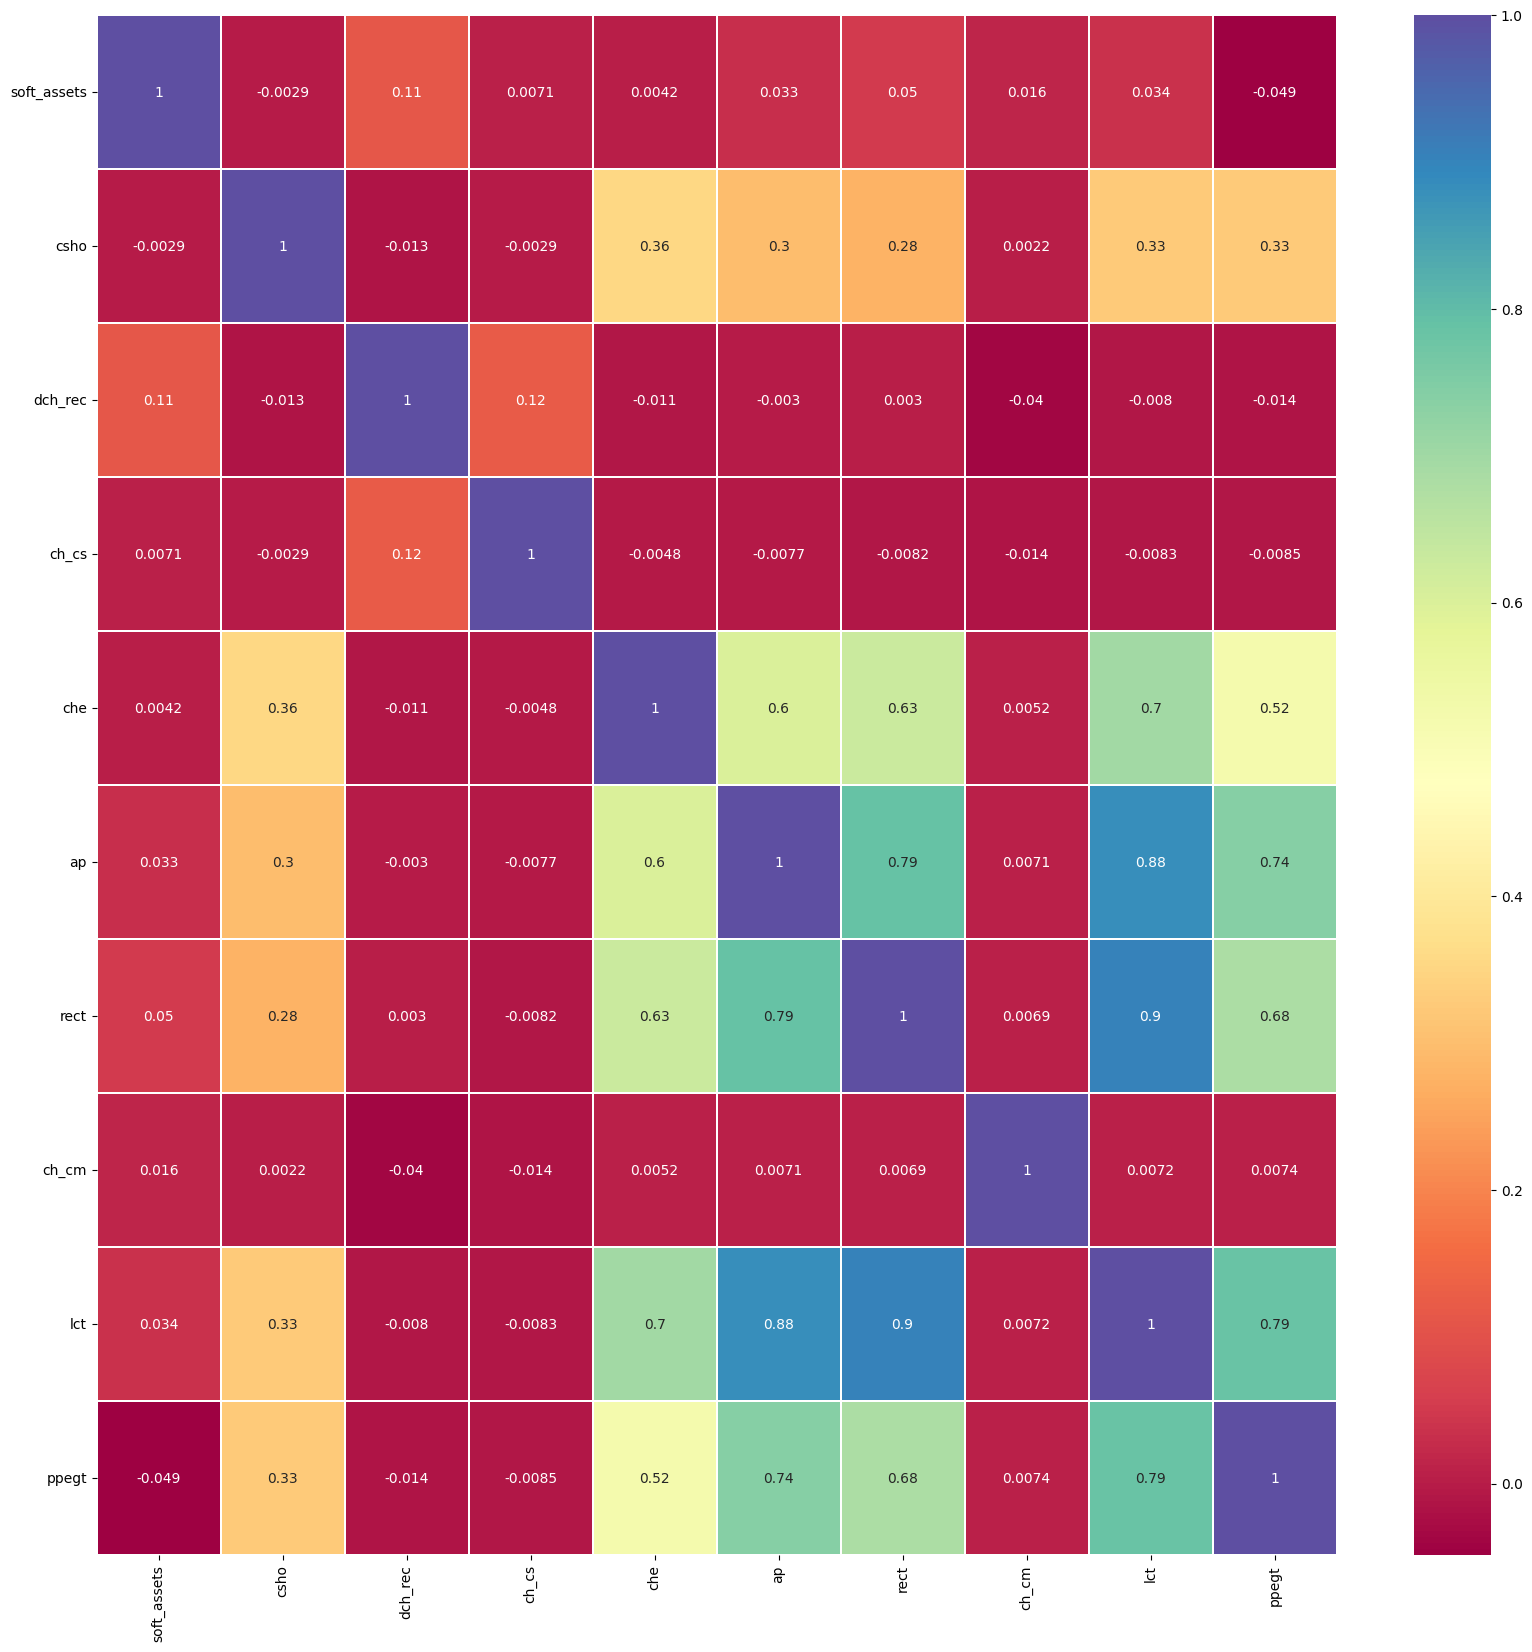

In [65]:
# Creating a correlation heatmap
sns.heatmap(X_reduced_2.corr(),annot=True, cmap='Spectral', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [66]:
#NO esta desbalanceado, no necesita balanceo
y_train.value_counts()

0    101566
1       665
Name: misstate, dtype: int64

In [67]:
X_reduced_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102231 entries, 0 to 102230
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   soft_assets  102231 non-null  float64
 1   csho         102231 non-null  float64
 2   dch_rec      102231 non-null  float64
 3   ch_cs        102231 non-null  float64
 4   che          102231 non-null  float64
 5   ap           102231 non-null  float64
 6   rect         102231 non-null  float64
 7   ch_cm        102231 non-null  float64
 8   lct          102231 non-null  float64
 9   ppegt        102231 non-null  float64
dtypes: float64(10)
memory usage: 7.8 MB


In [68]:
print('#### Mezclar la base de datos###############')
#Mezclar la base de datos
X_reduced_2 = X_reduced_2.sample(frac=1).reset_index(drop=True)
X_reduced_2.head(10)

#### Mezclar la base de datos###############


,soft_assets,csho,dch_rec,ch_cs,che,ap,rect,ch_cm,lct,ppegt
0,0.323973,-0.063522,-0.337252,0.071583,-0.091975,-0.065581,-0.079910,1.123260,-0.116561,-0.143397
1,-1.260660,-0.161893,-0.272281,0.260426,-0.154422,-0.174702,-0.166481,0.246761,-0.178533,-0.168279
2,-0.825258,-0.105466,0.135496,-0.141163,-0.156310,-0.168355,-0.156307,-0.125786,-0.170306,-0.155710
3,-0.332279,-0.056924,-0.158185,-0.127010,-0.166474,-0.174742,-0.167509,0.030215,-0.178456,-0.168873
4,1.349429,-0.103787,-0.082421,0.043935,-0.136913,-0.174191,-0.161828,0.008007,-0.166588,-0.167809
5,1.329829,-0.135630,-0.188197,0.822386,-0.162759,-0.154219,-0.158858,0.129898,-0.169686,-0.168340
6,-1.539995,-0.089806,-0.156648,-0.069420,-0.134115,-0.146392,-0.165816,0.035299,-0.152114,-0.119786
7,0.316605,-0.129098,-0.215684,-0.192518,-0.134240,-0.168047,-0.159827,0.061323,-0.159239,-0.166549
8,-0.621972,-0.058911,-0.102646,-0.142772,-0.013077,-0.170637,-0.146525,0.026003,-0.165246,-0.162493
9,1.233819,-0.156402,2.516596,-0.187982,-0.165799,-0.173834,-0.164548,0.372947,-0.177464,-0.168804


## Reducción de dimensionalidad con Standard Scaler

In [69]:
#Primer paso para PCA es identificar el valor promedio y dispersión de las variables.
print('----------------------')
print('Media de cada variable')
print('----------------------')
X_reduced_2.mean(axis=0)

----------------------
Media de cada variable
----------------------


soft_assets   -3.947807e-17
csho          -5.747952e-17
dch_rec        7.158876e-18
ch_cs         -3.197168e-18
che           -1.473477e-17
ap             1.779293e-17
rect          -1.070356e-17
ch_cm          3.562062e-18
lct           -1.278867e-17
ppegt          1.946102e-17
dtype: float64

In [70]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
X_reduced_2.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


soft_assets    1.00001
csho           1.00001
dch_rec        1.00001
ch_cs          1.00001
che            1.00001
ap             1.00001
rect           1.00001
ch_cm          1.00001
lct            1.00001
ppegt          1.00001
dtype: float64

# KMEANS

In [71]:
!pip install yellowbrick

In [72]:
from sklearn import metrics
from sklearn.cluster import KMeans

## Elbow Method

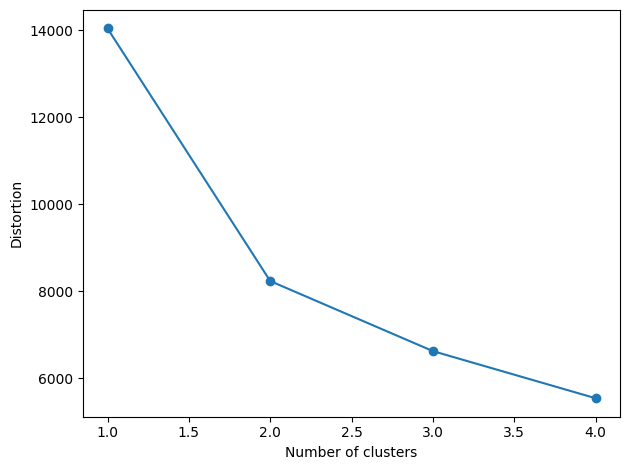

In [73]:
#1. Forma de Elbow Method for K means funete: Sebastian Raschka
distortions = []
for i in range(1, 5):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X_reduced_1)
    distortions.append(km.inertia_)
plt.plot(range(1, 5), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

- Se observa la distorsion de 800 y en tres cluster es claro el codo, no hay varición

## Segundo forma Elbow Method

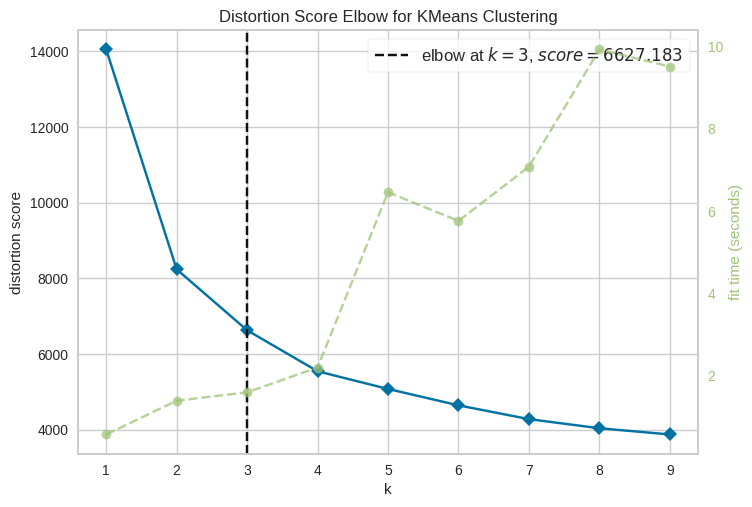

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
# 2. Forma de Elbow Method for K means- Fuente: Indraneel Dutta Baruah
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,10), timings= True)
visualizer.fit(X_reduced_1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Silhouette Score Kmean

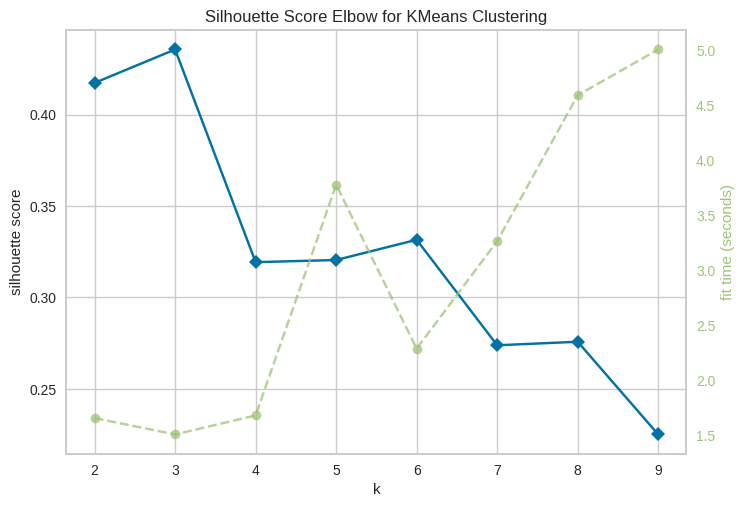

Optimal number of clusters based on silhouette score: [3]


In [75]:
# 2. Forma ed Silhouette Score for K means. Fuente: Indraneel Dutta Baruah

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(X_reduced_1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

- Mediante la inspeccion visual del grafico de silueta, podemos examinar los tamaños de los grupose identificar aquellos que comntinen outliers. Los coeficintes no se acrecan a 0 , indicador de un buen agrupamiento, hay un coefic. de silueta medio al grafico(linea roja punteada).

## Estadística de brecha para Kmeans

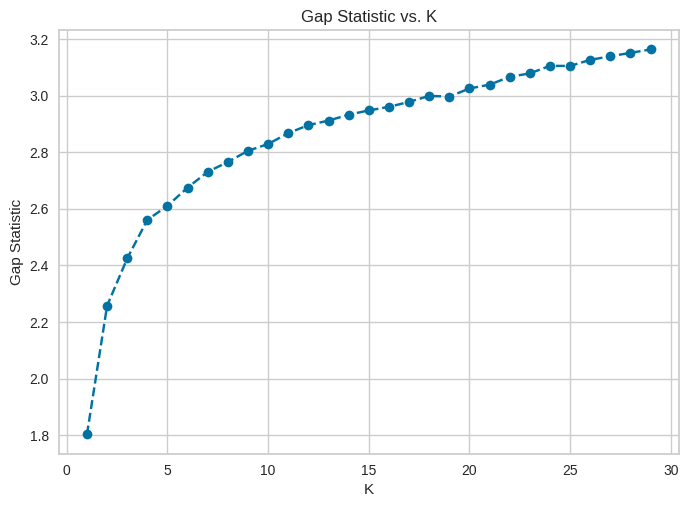

In [76]:
# Gap Statistic for K means. Fuente: Indraneel Dutta Baruah
# Tecnica demoradita ###


def optimalK(data, nrefs=3, maxClusters=10):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):

            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)

            # Fit to it
            km = KMeans(k, random_state =10)
            km.fit(randomReference)

            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)

        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap

        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)

score_g, df = optimalK(X_reduced_1, nrefs=5, maxClusters=30)

plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

df2 = df[df.gap == df.gap.max()]

## Calinski Harabasz Score para KMEANS

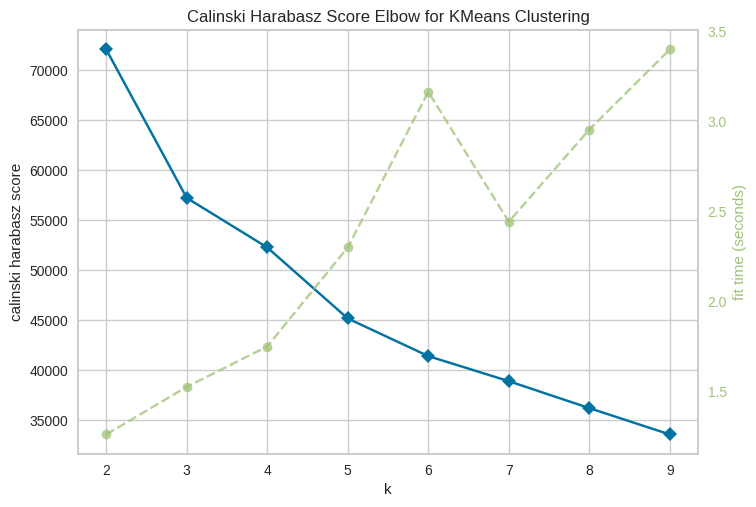

Optimal number of clusters based on calinski harabasz: [2]


In [77]:
# Calinski Harabasz Score for K means. Fuente: Indraneel Dutta Baruah

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(X_reduced_1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on calinski harabasz:', df4['centers'].tolist())

## Davies Bouldin Score para KMEANS

Optimal number of clusters based on DB score: [3]


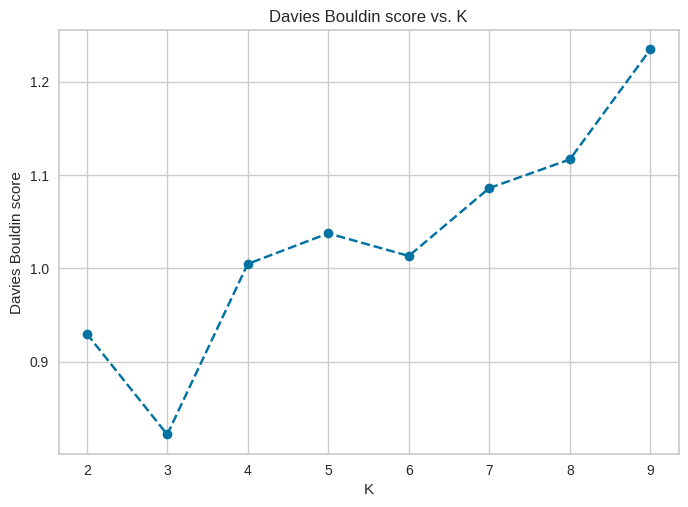

In [78]:
# Davies Bouldin score for K means. Fuente: Indraneel Dutta Baruah

from sklearn.metrics import davies_bouldin_score

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center,random_state =10)

    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(X_reduced_1)

    # Calculate Silhoutte Score

    score = davies_bouldin_score(X_reduced_1, model)

    return score

scores = []
centers = list(range(2,10))

for center in centers:
    scores.append(get_kmeans_score(X_reduced_1, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

## Resultados métricas internas Kmeans

In [80]:
# K means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Fit K-Means
kmeans_1 = KMeans(n_clusters=3, random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X_reduced_1)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(X_reduced_1, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(X_reduced_1, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(X_reduced_1, predictions)


print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.4356
Calinski Harabasz Score: 57216.5273
Davies Bouldin Score: 0.8222


In [81]:
def gap_stat_kmeans(data = X_reduced_1,nrefs=3,k=4):
    # Gap Stat
    refDisps = np.zeros(nrefs)
    # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
    for i in range(nrefs):

        # Create new random reference set
        randomReference = np.random.random_sample(size=X_reduced_1.shape)

        # Fit to it
        km = KMeans(k, random_state =10)
        km.fit(randomReference)

        refDisp = km.inertia_
        refDisps[i] = refDisp

    # Fit cluster to original data and create dispersion
    km = KMeans(k)
    km.fit(X_reduced_1)

    origDisp = km.inertia_

    # Calculate gap statistic
    score_g = np.log(np.mean(refDisps)) - np.log(origDisp)
    return score_g

score_kemans_g = gap_stat_kmeans(X_reduced_1,3,4)
print('Gap Statistic Score: %.4f' % score_kemans_g)

Gap Statistic Score: 2.5610


## Mapa de distancia entre grupos

---



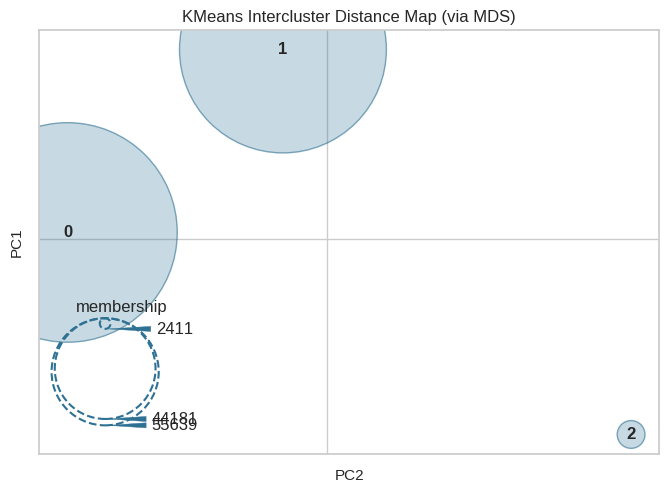

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [82]:
# Inter cluster distance map

from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer

visualizer = InterclusterDistance(kmeans_1)

visualizer.fit(X_reduced_1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#PCA

In [ ]:
# Función de bucle para identificar el número de componentes principales que explican al menos el 85% de la varianza

from sklearn.decomposition import PCA

for comp in range(2, X_reduced_1.shape[1]):
    modelo_pca = PCA(n_components= comp)
    modelo_pca.fit(X_reduced_1)
    comp_check = modelo_pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break

Final_PCA = PCA(n_components= final_comp)
Final_PCA.fit(X_reduced_1)
cluster_df=Final_PCA.transform(X_reduced_1)

num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))
#con 3 comp explicacion de la variabilidad del 87% con mormalizado

In [ ]:
#Se convierte el array a dataframe para añadir nombrs a los ejes(x=Componentes, Y=caracteriticas)
pd.DataFrame(modelo_pca.components_,columns=X_reduced_1.columns,index = [f'PC-{i+1}' for i in range(final_comp)]).T

In [ ]:
#Vector con el porcentaje de influencia de la varianza explicada por cada componente,
# de las 12 variables resultantes del conjunto de datos
explained_variance = modelo_pca.explained_variance_ratio_
explained_variance

In [ ]:
explained_variance.sum()

###  Los componentes corresponden a combinaciones de las características originales, los propios componentes se almacenan como un atributo del objeto PCA ajustado:

In [ ]:
Final_PCA.components_

- En esta matriz numpy, cada fila representa un componente principal, y cada columna se relaciona con las características originales. podemos visualizar esta relación con un mapa de calor:

### INFLUENCIA DE LAS VARIABLES POR COMPONENTES


In [ ]:
df_comp = pd.DataFrame(modelo_pca.components_, columns=X_reduced_1.columns,index = [f'PC-{i+1}' for i in range(final_comp)])

In [ ]:
sns.heatmap(df_comp,annot=True, cmap='plasma', linewidths=0.1);
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

 Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos **explained_variance_ y explained_variance_ratio_** del modelo.

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Percentage of variance explanation by each component')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X_reduced_1.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentage of variance explanation by each component')
ax.set_xlabel('Principal component')
ax.set_ylabel('Percentage of variance explanation');

**En este caso, la primera componente uno explica el 48% de la varianza observada en los datos y la segunda el 27%. Sumando (0.48+0.27+0,07+0.06= 88%). Entonces con las primeras dos componentes, se consigue explicar unn 75% de la varianza observada, a partir de la segunda no superan por separado el 1% de varianza explicada**

In [ ]:
#Visualizacion
cluster_df.shape
cluster_df = pd.DataFrame(cluster_df,index=X_reduced_1.index)
cluster_df

Los 3 componentes principales resultantes son los 3valores propios de los vectores propios con el valor más alto de los 12 originales del conjunto de datos. De ahí se obtuvieron los seis más altos para obtener las 6 dimensiones resultantes o componentes principales

### Entrenamiento de KMEANS con el conjunto de datos reducido

In [ ]:
from sklearn.cluster import KMeans

kmeans_2 = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_2.fit_predict(cluster_df)

In [ ]:
# Agregación de las etiquetas numéricas al DataFrame
data1['cluster_label'] = labels

In [ ]:
X_fraud = X_reduced_1  # Tus características
y_fraud = data1['cluster_label']  # La etiqueta numérica que hemos asignado

In [ ]:
y_fraud.value_counts()

In [4]:
from collections import Counter

# Evaluamos los clusters y el contenido que se han formado
counter = Counter(clusters.tolist())
bad_counter = Counter(clusters[y_fraud == 1].tolist())

for key in sorted(counter.keys()):
    print("Label {0} has {1} samples - {2} are malicious samples".format(
        key, counter[key], bad_counter[key]))

NameError: ignored

## Evaluación de los resultados- Revisar la Teoria de las Metricas de Evaluación

#### Metricas Externas(en función de etiquetas conocidas, data no usada en clustering y clusters del objeto Kmeans


In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [ ]:
# Calculamos el purity score, es importante darse cuenta de que recibe las etiquetas
print("Purity Score: %0.2f" % purity_score(y_fraud,  kmeans_2.labels_))

In [ ]:
print("Homogeneity_score: %0.2f" % metrics.homogeneity_score(y_fraud,  kmeans_2.labels_))

In [ ]:
print("Completeness_score: %0.2f" % metrics.completeness_score(y_fraud, clusters))

In [ ]:
print("v_measure_score:  %0.2f" % metrics.v_measure_score(y_fraud, clusters))

In [ ]:
print("Adjusted_rand_score: %0.2f" % metrics.adjusted_rand_score(y_fraud, clusters))

In [ ]:
print("Adjusted_mutual_info_score: %0.2f" % metrics.adjusted_mutual_info_score(y_fraud, clusters))

#### Metricas Internas(Función de los datos agrupados y clusters del objeto Kmeans)

In [ ]:
# Calculamos el coeficiente de Shiloutte, es importante darse cuenta de que no le pasamos las etiquetas
print("Shiloutte: %0.2f" % metrics.silhouette_score(cluster_df, kmeans_2.labels_, metric='euclidean'))

In [ ]:
# Calculamos el Calinski harabasz score, es importante darse cuenta de que no le pasamos las etiquetas, se escogio data escalada
print("Calinski harabasz: %0.2f" % metrics.calinski_harabasz_score(cluster_df, clusters))

In [ ]:
from sklearn.metrics import davies_bouldin_score
print("davies_bouldin_score:  %0.3f" % davies_bouldin_score(cluster_df, clusters))

# Heirarchical Clustering

## Elbow Method for Heirarchical Clustering


In [1]:
# Elbow Method for Heirarchical Clustering
from sklearn.cluster import MiniBatchKMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X_reduced_1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

NameError: ignored

## Silhouette Score for Hierarchical Clustering


In [2]:
# Silhouette Score for Hierarchical Clustering

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(X_reduced_1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

NameError: ignored

## Calinski Harabasz Score for Hierarchical Clustering


In [ ]:
# Calinski Harabasz Score for Hierarchical Clustering

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(X_reduced_1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

## Davies Bouldin score for Hierarchical Clustering


In [ ]:
# Davies Bouldin score for Hierarchical Clustering

from sklearn.metrics import davies_bouldin_score

def get_AG_clustering_score(data, center):
    '''
    returns the AG_clustering score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit AG_clustering to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the AG_clustering model fit to the data
    '''
    #instantiate AG_clustering
    AG_clustering = AgglomerativeClustering(n_clusters= center)

    # Then fit the model to your data using the fit method
    model = AG_clustering.fit_predict(X_reduced_1)

    # Calculate Silhoutte Score

    score = davies_bouldin_score(X_reduced_1, model)

    return score3
scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_AG_clustering_score(X_reduced_1, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

## Dendrogram for Hierarchical Clustering


In [ ]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))
pyplot.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X_reduced_1, method='ward'))

## Agglomerative clustering

In [ ]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

# define the model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model.fit(cX_reduced_1)
yhat_2 = model.fit_predict(X_reduced_1)
# retrieve unique clusters
clusters = unique(yhat)


# Calculate cluster validation metrics

score_AGclustering_s = silhouette_score(X_reduced_1, yhat.labels_, metric='euclidean')

score_AGclustering_c = calinski_harabasz_score(X_reduced_1, yhat.labels_)

score_AGclustering_d = davies_bouldin_score(X_reduced_1, yhat_2)


print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

# DBSCAN

In [ ]:
pip install kneed

In [ ]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X_reduced_1)
distances, indices = neighbors.kneighbors(X_reduced_1)
distances = np.sort(distances[:,10], axis=0)

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

## Silhouette Score para DBSCAN

In [ ]:
# Silhouette Score for DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):
    '''

    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Silhouette Score for DBSCAN
    '''
    #instantiate kmeans
    dbscan = DBSCAN(eps= 1.9335816413107338, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(X_reduced_1)

    # Calculate Silhoutte Score

    score = silhouette_score(X_reduced_1, model.labels_, metric='euclidean')

    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(X_reduced_1, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_samples based on silhouette score:', df4['min_samples'].tolist())

## Calinski Harabasz para DBSCAN

In [ ]:
# Calinski Harabasz for DBSCAN

from sklearn.metrics import calinski_harabasz_score

def get_dbscan_score(data, center):
    '''

    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Calinski Harabasz score for the dbscan model fit to the data
    '''
    #instantiate dbscan
    dbscan = DBSCAN(eps= 1.9335816413107338, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(X_reduced_1)

    # Calculate Silhoutte Score

    score = calinski_harabasz_score(X_reduced_1, dbscan.labels_)

    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(X_reduced_1, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_sample');
plt.ylabel('Calinski Harabasz');
plt.title('Calinski Harabasz vs. min_sample');

df3 = pd.DataFrame(centers,columns=['min_sample'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_sample based on Calinski Harabasz score:', df4['min_sample'].tolist())

## Davies Bouldin score for DBSCAN

In [ ]:
# Davies Bouldin score for DBSCAN

from sklearn.metrics import davies_bouldin_score

def get_dbscan_score(data, center):
    '''
    returns the dbscan score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the dbscan model fit to the data
    '''
    #instantiate dbscan
    dbscan = DBSCAN(eps= 1.9335816413107338, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit_predict(X_reduced_1)

    # Calculate Silhoutte Score

    score = davies_bouldin_score(X_reduced_1, model)

    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(X_reduced_1, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. min_samples');


df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of min_samples based on DB score:', df4['min_samples'].tolist())

## Resultados métricas internas DBSCAN

In [ ]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=1.9335816413107338, min_samples= 18)

# rule of thumb for min_samples: 2*len(cluster_df.columns)

# fit model and predict clusters
yhat = model.fit_predict(X_reduced_1)
# retrieve unique clusters
clusters = unique(yhat)


# Calculate cluster validation metrics

score_dbsacn_s = silhouette_score(X_reduced_1, yhat, metric='euclidean')

score_dbsacn_c = calinski_harabasz_score(X_reduced_1, yhat)

score_dbsacn_d = davies_bouldin_score(X_reduced_1, yhat)

print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

# GMM Clustering

In [ ]:
# BIC for GMM

from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        gmm.fit(X_reduced_1)
        score.append((cov,n_comp,gmm.bic(X_reduced_1)))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','BIC_Score']
score_2 = score_1[score_1.BIC_Score == score_1.BIC_Score.min()]

score_2.head(n=2)

## Silhouette Score for GMM

In [ ]:
# Silhouette Score for GMM
n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov,random_state = 10)
        model = gmm.fit(X_reduced_1)
        model_2 = model.predict(X_reduced_1)
        score_s = silhouette_score(X_reduced_1, model_2, metric='euclidean')
        score.append((cov,n_comp,score_s))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head(n=2)

## Calinski Harabasz Score for GMM

In [ ]:
# Calinski Harabasz Score for GMM

n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(X_reduced_1)
        model_2 = model.predict(X_reduced_1)
        score_c = calinski_harabasz_score(X_reduced_1, model_2)
        score.append((cov,n_comp,score_c))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Calinski_Harabasz_Score']
score_2 = score_1[score_1.Calinski_Harabasz_Score == score_1.Calinski_Harabasz_Score.max()]
score_2.head(n=5)

## Davies Bouldin Score for GMM

In [ ]:
# Davies Bouldin Score for GMM
n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(X_reduced_1)
        model_2 = model.predict(X_reduced_1)
        score_d = davies_bouldin_score(X_reduced_1, model_2)
        score.append((cov,n_comp,score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Davies_Bouldin_Score']
score_2 = score_1[score_1.Davies_Bouldin_Score == score_1.Davies_Bouldin_Score.max()]
score_2.head(n=2)

## Resultados Métricas internas GMM

In [ ]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 26,covariance_type= "full", random_state = 10)
# fit the model
model.fit(X_reduced_1)
# assign a cluster to each example
yhat = model.predict(X_reduced_1)
# retrieve unique clusters
clusters = unique(yhat)


# Calculate cluster validation score

score_dbsacn_s = silhouette_score(X_reduced_1, yhat, metric='euclidean')

score_dbsacn_c = calinski_harabasz_score(X_reduced_1, yhat)

score_dbsacn_d = davies_bouldin_score(X_reduced_1, yhat)


print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)